In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## Importing the data (World Happiness Index)
Comes in 5 separate .csv files for the years 2015 - 2019<br>
Extracting the data into a dictionary for easy access <br>
(*make sure that the 5 .csv files are in the same place as the .ipynb file for this to work)

In [2]:
# data is a dictionary where key = 0 - 4 and values are pd.DataFrames for the years 2015 - 2019
x = 2015
data = {}
for i in range(5):
    data[i] = pd.read_csv(f'{x}.csv')
    print(f"{x} dataset: ")
    print("Shape: ", data[i].shape)
    display(data[i].head(3))
    x += 1

2015 dataset: 
Shape:  (158, 12)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


2016 dataset: 
Shape:  (157, 13)


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


2017 dataset: 
Shape:  (155, 12)


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


2018 dataset: 
Shape:  (156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


2019 dataset: 
Shape:  (156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [3]:
# Identifying column names:
x = 2015
for i in range(5):
    print(f"Column names for year {x}:\n", data[i].columns)
    x += 1

Column names for year 2015:
 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Column names for year 2016:
 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Column names for year 2017:
 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Column names for year 2018:
 Index(['Overall ra

#### Notice how the shapes of almost all the datasets for each year is different (except 2018 and 2019) <br>Changes made to row = different no. of countries taken into consideration, <br>Changes made to column = different set of variables considered

## Data Cleaning
### Things to do:
<ol>
    <li> Standardize column names, e.g "Trust (Government Corruption)" and "Perceptions of corruption" are the same variables
    <li> Add a column for 'Year' (idea is to combine everything into 1 dataset later on)
    <li> Add the "Region" column for 2017 - 2019 data
    <li> Drop the non-common columns in the datasets
    <li> Handle missing values
</ol>

In [4]:
# To check columns of dataset - see if named correctly etc.
def showcase(data, val):
    for i in range(5):
        display(data[i].head(val))
        print(data[i].shape)

In [5]:
# 1. Renaming columns (to standardise naming):
# 2015 and 2016 data have the same naming convention
for i in range(2):
    data[i].rename(columns = {'Economy (GDP per Capita)' : 'GDP',
                              'Health (Life Expectancy)' : 'Life exp.',
                              'Trust (Government Corruption)' : 'Govt. trust'}, inplace = True)

# 2017 has a "unique" naming convention used for columns, for some reason
data[2].rename(columns = {'Happiness.Rank' : 'Happiness Rank',
                          'Happiness.Score' : 'Happiness Score',
                          'Economy..GDP.per.Capita.' : 'GDP',
                          'Health..Life.Expectancy.' : 'Life exp.',
                          'Trust..Government.Corruption.' : 'Govt. trust',
                          'Dystopia.Residual' : 'Dystopia Residual'}, inplace = True)

# 2018 and 2019 data have the same naming convention
for i in range(3,5):
    data[i].rename(columns = {'Overall rank' : 'Happiness Rank',
                              'Country or region' : 'Country',
                              'Score' : 'Happiness Score',
                              'Social support' : 'Family',
                              'Healthy life expectancy' : 'Life exp.',
                              'GDP per capita' : 'GDP',
                              'Freedom to make life choices' : 'Freedom',
                              'Perceptions of corruption' : 'Govt. trust'}, inplace = True)

showcase(data, 3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


(158, 12)


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


(157, 13)


,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,GDP,Family,Life exp.,Freedom,Generosity,Govt. trust,Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


(155, 12)


,Happiness Rank,Country,Happiness Score,GDP,Family,Life exp.,Freedom,Generosity,Govt. trust
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


(156, 9)


,Happiness Rank,Country,Happiness Score,GDP,Family,Life exp.,Freedom,Generosity,Govt. trust
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


(156, 9)


In [6]:
# 2. Add the year into the dataset
for i in range(5):
    data[i]['Year'] = 2015 + i

showcase(data, 3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015


(158, 13)


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016


(157, 14)


,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,GDP,Family,Life exp.,Freedom,Generosity,Govt. trust,Dystopia Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017


(155, 13)


,Happiness Rank,Country,Happiness Score,GDP,Family,Life exp.,Freedom,Generosity,Govt. trust,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018


(156, 10)


,Happiness Rank,Country,Happiness Score,GDP,Family,Life exp.,Freedom,Generosity,Govt. trust,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019


(156, 10)


In [7]:
# 3. 'Region' column missing in 2017 - 2019 data, appending 'Region' data to them
# 2015 data has the most countries listed - most available region data

for i in range(2,5):
    data[i]['Region'] = None
    # Getting the country to region 'mapping' in series form, key = 'Country', value = 'Region'
    base = data[0].set_index('Country').Region
    target = data[i].set_index('Country').Region
    # 'Fill' the Regions in based on Country
    standard = target.fillna(base)
    # Update the actual data
    data[i].fillna(standard.reset_index(), inplace = True)

showcase(data, 5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


(158, 13)


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


(157, 14)


,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,GDP,Family,Life exp.,Freedom,Generosity,Govt. trust,Dystopia Residual,Year,Region
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017,Western Europe
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017,Western Europe
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017,Western Europe
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017,Western Europe
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017,Western Europe


(155, 14)


,Happiness Rank,Country,Happiness Score,GDP,Family,Life exp.,Freedom,Generosity,Govt. trust,Year,Region
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018,Western Europe
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018,Western Europe
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018,Western Europe
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018,Western Europe
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018,Western Europe


(156, 11)


,Happiness Rank,Country,Happiness Score,GDP,Family,Life exp.,Freedom,Generosity,Govt. trust,Year,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,Western Europe


(156, 11)


In [8]:
# 4. Re-indexing columns + removal of non-common columns
Col = ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'GDP', 'Family', 'Life exp.', 'Freedom',
       'Govt. trust', 'Generosity', 'Year']

for i in range(5):
    data[i] = data[i].reindex(Col, axis = "columns")

showcase(data, 3)

,Country,Region,Happiness Rank,Happiness Score,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015


(158, 11)


,Country,Region,Happiness Rank,Happiness Score,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Year
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016


(157, 11)


,Country,Region,Happiness Rank,Happiness Score,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Year
0,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2017
1,Denmark,Western Europe,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2017
2,Iceland,Western Europe,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2017


(155, 11)


,Country,Region,Happiness Rank,Happiness Score,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Year
0,Finland,Western Europe,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202,2018
1,Norway,Western Europe,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286,2018
2,Denmark,Western Europe,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284,2018


(156, 11)


,Country,Region,Happiness Rank,Happiness Score,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Year
0,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153,2019
1,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252,2019
2,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271,2019


(156, 11)


In [9]:
# 5. Check for any missing values
x = 2015
for i in range(5):
    print(f"Year {x + i}:")
    print(data[i].isnull().sum())
    print()

Year 2015:
Country            0
Region             0
Happiness Rank     0
Happiness Score    0
GDP                0
Family             0
Life exp.          0
Freedom            0
Govt. trust        0
Generosity         0
Year               0
dtype: int64

Year 2016:
Country            0
Region             0
Happiness Rank     0
Happiness Score    0
GDP                0
Family             0
Life exp.          0
Freedom            0
Govt. trust        0
Generosity         0
Year               0
dtype: int64

Year 2017:
Country            0
Region             6
Happiness Rank     0
Happiness Score    0
GDP                0
Family             0
Life exp.          0
Freedom            0
Govt. trust        0
Generosity         0
Year               0
dtype: int64

Year 2018:
Country            0
Region             6
Happiness Rank     0
Happiness Score    0
GDP                0
Family             0
Life exp.          0
Freedom            0
Govt. trust        1
Generosity         0
Year       

#### Region data for 2017 - 2019 has missing values
<ul>
    <li>2017 has 6 missing regions 
    <li>2018 has 6 missing regions and 1 missing Govt. trust value 
    <li>2019 has 7 missing regions
</ul>

In [10]:
# Null regions:
nul = {}
x = 2017
for i in range(3):
    print(f"Missing values in {x + i}:")
    display(data[2 + i][data[2 + i].isnull().any(axis = 1)])
    # Recording down the rows of 2017 - 2019 data that have NaN values
    nul[i] = data[2 + i][data[2 + i].isnull().any(axis = 1)]

Missing values in 2017:


,Country,Region,Happiness Rank,Happiness Score,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Year
32,Taiwan Province of China,NaN,33,6.422,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2017
49,Belize,NaN,50,5.956,0.907975,1.081418,0.450192,0.547509,0.096581,0.240016,2017
70,"Hong Kong S.A.R., China",NaN,71,5.472,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,2017
92,Somalia,NaN,93,5.151,0.022643,0.721151,0.113989,0.602127,0.282410,0.291631,2017
110,Namibia,NaN,111,4.574,0.964434,1.098471,0.338612,0.520304,0.093147,0.077134,2017
146,South Sudan,NaN,147,3.591,0.397249,0.601323,0.163486,0.147062,0.116794,0.285671,2017


Missing values in 2018:


,Country,Region,Happiness Rank,Happiness Score,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Year
19,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096,0.776,0.670,0.284,NaN,0.186,2018
37,Trinidad & Tobago,NaN,38,6.192,1.223,1.492,0.564,0.575,0.019,0.171,2018
48,Belize,NaN,49,5.956,0.807,1.101,0.474,0.593,0.089,0.183,2018
57,Northern Cyprus,NaN,58,5.835,1.229,1.211,0.909,0.495,0.154,0.179,2018
97,Somalia,NaN,98,4.982,0.000,0.712,0.115,0.674,0.282,0.238,2018
118,Namibia,NaN,119,4.441,0.874,1.281,0.365,0.519,0.064,0.051,2018
153,South Sudan,NaN,154,3.254,0.337,0.608,0.177,0.112,0.106,0.224,2018


Missing values in 2019:


,Country,Region,Happiness Rank,Happiness Score,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Year
38,Trinidad & Tobago,NaN,39,6.192,1.231,1.477,0.713,0.489,0.016,0.185,2019
63,Northern Cyprus,NaN,64,5.718,1.263,1.252,1.042,0.417,0.162,0.191,2019
83,North Macedonia,NaN,84,5.274,0.983,1.294,0.838,0.345,0.034,0.185,2019
111,Somalia,NaN,112,4.668,0.000,0.698,0.268,0.559,0.270,0.243,2019
112,Namibia,NaN,113,4.639,0.879,1.313,0.477,0.401,0.056,0.070,2019
119,Gambia,NaN,120,4.516,0.308,0.939,0.428,0.382,0.167,0.269,2019
155,South Sudan,NaN,156,2.853,0.306,0.575,0.295,0.010,0.091,0.202,2019


In [11]:
# List of available regions:
print(data[0]['Region'].unique())

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


#### ^ Available regions will be used to "fill up" the missing values

In [12]:
# Function to replace the null regions for each dataset from 2017 - 2019
def update_out(data, nul):
    for i in range(3):
        # Using 'Happiness Rank' to derive the index no. ('Happiness Rank' - 1)
        index = nul[i]['Happiness Rank']
        for j in index:
            data_in = 2 + i
            country = data[data_in].loc[(j - 1), 'Country']
            if country == 'Belize':
                data[data_in].loc[(j - 1), ['Region']] = 'North America'
            elif country == 'Hong Kong S.A.R., China' or country == 'Taiwan Province of China':
                data[data_in].loc[(j - 1), ['Region']] = 'Eastern Asia'
            elif country == 'Somalia' or country == 'Namibia' or country == 'South Sudan' or country == 'Gambia':
                data[data_in].loc[(j - 1), ['Region']] = 'Sub-Saharan Africa'
            elif country == 'Trinidad & Tobago':
                data[data_in].loc[(j - 1), ['Region']] = 'Latin America and Caribbean'
            elif country == 'Northern Cyprus':
                data[data_in].loc[(j - 1), ['Region']] = 'Middle East and Northern Africa'
            elif country == 'North Macedonia':
                data[data_in].loc[(j - 1), ['Region']] = 'Central and Eastern Europe'

In [13]:
# Function to check those values AFTER the replacement has been done
def check_out(data, nul):
    for i in range(3):
        test = list(nul[i]['Happiness Rank'])
        test_df = data[2 + i][data[2 + i]['Happiness Rank'].isin(test)]
        display(test_df)

In [14]:
# Calling the 'update outlier' function
update_out(data, nul)
# Checking whether Region has been added correctly
check_out(data, nul)

,Country,Region,Happiness Rank,Happiness Score,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Year
32,Taiwan Province of China,Eastern Asia,33,6.422,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2017
49,Belize,North America,50,5.956,0.907975,1.081418,0.450192,0.547509,0.096581,0.240016,2017
70,"Hong Kong S.A.R., China",Eastern Asia,71,5.472,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,2017
92,Somalia,Sub-Saharan Africa,93,5.151,0.022643,0.721151,0.113989,0.602127,0.282410,0.291631,2017
110,Namibia,Sub-Saharan Africa,111,4.574,0.964434,1.098471,0.338612,0.520304,0.093147,0.077134,2017
146,South Sudan,Sub-Saharan Africa,147,3.591,0.397249,0.601323,0.163486,0.147062,0.116794,0.285671,2017


,Country,Region,Happiness Rank,Happiness Score,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Year
19,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096,0.776,0.670,0.284,NaN,0.186,2018
37,Trinidad & Tobago,Latin America and Caribbean,38,6.192,1.223,1.492,0.564,0.575,0.019,0.171,2018
48,Belize,North America,49,5.956,0.807,1.101,0.474,0.593,0.089,0.183,2018
57,Northern Cyprus,Middle East and Northern Africa,58,5.835,1.229,1.211,0.909,0.495,0.154,0.179,2018
97,Somalia,Sub-Saharan Africa,98,4.982,0.000,0.712,0.115,0.674,0.282,0.238,2018
118,Namibia,Sub-Saharan Africa,119,4.441,0.874,1.281,0.365,0.519,0.064,0.051,2018
153,South Sudan,Sub-Saharan Africa,154,3.254,0.337,0.608,0.177,0.112,0.106,0.224,2018


,Country,Region,Happiness Rank,Happiness Score,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Year
38,Trinidad & Tobago,Latin America and Caribbean,39,6.192,1.231,1.477,0.713,0.489,0.016,0.185,2019
63,Northern Cyprus,Middle East and Northern Africa,64,5.718,1.263,1.252,1.042,0.417,0.162,0.191,2019
83,North Macedonia,Central and Eastern Europe,84,5.274,0.983,1.294,0.838,0.345,0.034,0.185,2019
111,Somalia,Sub-Saharan Africa,112,4.668,0.000,0.698,0.268,0.559,0.270,0.243,2019
112,Namibia,Sub-Saharan Africa,113,4.639,0.879,1.313,0.477,0.401,0.056,0.070,2019
119,Gambia,Sub-Saharan Africa,120,4.516,0.308,0.939,0.428,0.382,0.167,0.269,2019
155,South Sudan,Sub-Saharan Africa,156,2.853,0.306,0.575,0.295,0.010,0.091,0.202,2019


#### Govt. trust data for UAE in 2018 is missing
Will use avg. over the <strong>previous</strong> years

In [15]:
# Get previous Govt. trust data from 2015 - 2017 and find avg.
total = 0
for i in range(3):
    val = data[i][(data[i]['Country'] == 'United Arab Emirates')]['Govt. trust']
    total += val.item()

# Avg. trust value
fill_val = total / 3

# Updating the DataFrame
data[3].loc[19, ['Govt. trust']] = fill_val

# Checking whether Govt. trust for 2018 UAE has been updated
check_out(data, nul)

,Country,Region,Happiness Rank,Happiness Score,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Year
32,Taiwan Province of China,Eastern Asia,33,6.422,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2017
49,Belize,North America,50,5.956,0.907975,1.081418,0.450192,0.547509,0.096581,0.240016,2017
70,"Hong Kong S.A.R., China",Eastern Asia,71,5.472,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,2017
92,Somalia,Sub-Saharan Africa,93,5.151,0.022643,0.721151,0.113989,0.602127,0.282410,0.291631,2017
110,Namibia,Sub-Saharan Africa,111,4.574,0.964434,1.098471,0.338612,0.520304,0.093147,0.077134,2017
146,South Sudan,Sub-Saharan Africa,147,3.591,0.397249,0.601323,0.163486,0.147062,0.116794,0.285671,2017


,Country,Region,Happiness Rank,Happiness Score,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Year
19,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096,0.776,0.670,0.284,0.35531,0.186,2018
37,Trinidad & Tobago,Latin America and Caribbean,38,6.192,1.223,1.492,0.564,0.575,0.01900,0.171,2018
48,Belize,North America,49,5.956,0.807,1.101,0.474,0.593,0.08900,0.183,2018
57,Northern Cyprus,Middle East and Northern Africa,58,5.835,1.229,1.211,0.909,0.495,0.15400,0.179,2018
97,Somalia,Sub-Saharan Africa,98,4.982,0.000,0.712,0.115,0.674,0.28200,0.238,2018
118,Namibia,Sub-Saharan Africa,119,4.441,0.874,1.281,0.365,0.519,0.06400,0.051,2018
153,South Sudan,Sub-Saharan Africa,154,3.254,0.337,0.608,0.177,0.112,0.10600,0.224,2018


,Country,Region,Happiness Rank,Happiness Score,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Year
38,Trinidad & Tobago,Latin America and Caribbean,39,6.192,1.231,1.477,0.713,0.489,0.016,0.185,2019
63,Northern Cyprus,Middle East and Northern Africa,64,5.718,1.263,1.252,1.042,0.417,0.162,0.191,2019
83,North Macedonia,Central and Eastern Europe,84,5.274,0.983,1.294,0.838,0.345,0.034,0.185,2019
111,Somalia,Sub-Saharan Africa,112,4.668,0.000,0.698,0.268,0.559,0.270,0.243,2019
112,Namibia,Sub-Saharan Africa,113,4.639,0.879,1.313,0.477,0.401,0.056,0.070,2019
119,Gambia,Sub-Saharan Africa,120,4.516,0.308,0.939,0.428,0.382,0.167,0.269,2019
155,South Sudan,Sub-Saharan Africa,156,2.853,0.306,0.575,0.295,0.010,0.091,0.202,2019


In [16]:
# Combining everything into 1 single DataFrame
data_clean = pd.concat(data)

display(data_clean)

Country              Region  Happiness Rank  \
0 0                 Switzerland      Western Europe               1   
  1                     Iceland      Western Europe               2   
  2                     Denmark      Western Europe               3   
  3                      Norway      Western Europe               4   
  4                      Canada       North America               5   
...                         ...                 ...             ...   
4 151                    Rwanda  Sub-Saharan Africa             152   
  152                  Tanzania  Sub-Saharan Africa             153   
  153               Afghanistan       Southern Asia             154   
  154  Central African Republic  Sub-Saharan Africa             155   
  155               South Sudan  Sub-Saharan Africa             156   

       Happiness Score      GDP   Family  Life exp.  Freedom  Govt. trust  \
0 0              7.587  1.39651  1.34951    0.94143  0.66557      0.41978   
  1              7.561  1.30232  1.40223    0.94784  0.62877      0.14145   
  2              7.527  1.32548  1.36058    0.87464  0.64938      0.48357   
  3              7.522  1.45900  1.33095    0.88521  0.66973      0.36503   
  4              7.427  1.32629  1.32261    0.90563  0.63297      0.32957   
...                ...      ...      ...        ...      ...          ...   
4 151            3.334  0.35900  0.71100    0.61400  0.55500      0.41100   
  152            3.231  0.47600  0.88500    0.49900  0.41700      0.14700   
  153            3.203  0.35000  0.51700    0.36100  0.00000      0.02500   
  154            3.083  0.02600  0.00000    0.10500  0.22500      0.03500   
  155            2.853  0.30600  0.57500    0.29500  0.01000      0.09100   

       Generosity  Year  
0 0       0.29678  2015  
  1       0.43630  2015  
  2       0.34139  2015  
  3       0.34699  2015  
  4       0.45811  2015  
...           ...   ...  
4 151     0.21700  2019  
  152     0.27600  2019  
  153     0.15800  2019  
  154     0.23500  2019  
  155     0.20200  2019  

[782 rows x 11 columns]

#### Note that there is an additional column for 'Year' to differentiate between the originally separate datasets

# Exploratory Data Analysis

## Basic statistical summaries

In [17]:
data_clean.describe()

,Happiness Rank,Happiness Score,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.125730,0.218576,2016.993606
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.106068,0.122321,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.054250,0.130000,2016.000000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.091033,0.201982,2017.000000
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.156243,0.278832,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,2019.000000


In [18]:
data_clean.dtypes

Country             object
Region              object
Happiness Rank       int64
Happiness Score    float64
GDP                float64
Family             float64
Life exp.          float64
Freedom            float64
Govt. trust        float64
Generosity         float64
Year                 int64
dtype: object

In [19]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 782 entries, (0, 0) to (4, 155)
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          782 non-null    object 
 1   Region           782 non-null    object 
 2   Happiness Rank   782 non-null    int64  
 3   Happiness Score  782 non-null    float64
 4   GDP              782 non-null    float64
 5   Family           782 non-null    float64
 6   Life exp.        782 non-null    float64
 7   Freedom          782 non-null    float64
 8   Govt. trust      782 non-null    float64
 9   Generosity       782 non-null    float64
 10  Year             782 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 74.9+ KB


## Correlation between variables
(Mainly focusing on Happiness Score)

<AxesSubplot:>

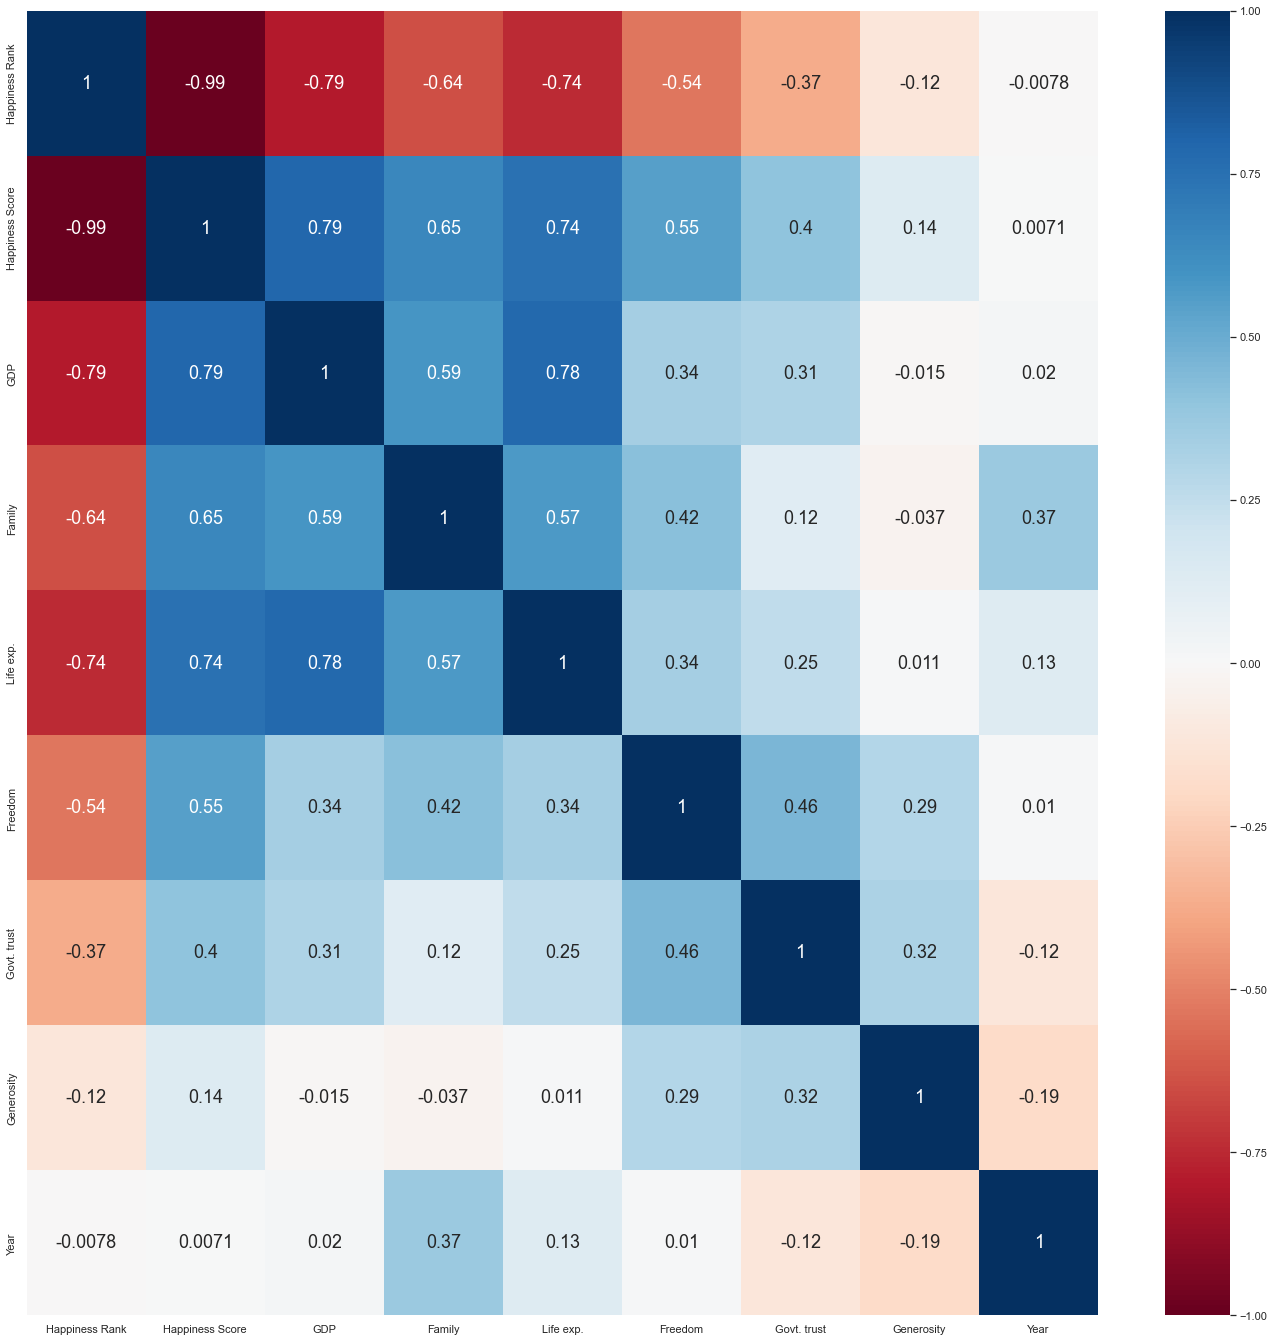

In [20]:
# Finding correlation between all the variables
f = plt.figure(figsize=(24, 24))
sb.heatmap(data_clean.corr(), vmax = 1, vmin = -1, cmap = "RdBu", annot = True, annot_kws = {'size':18})

#### (Focusing on Happiness Score) Obvious strong correlation to Happiness Rank (-0.99), so we will ignore that. Apart from that, moderately strong correlation between Happiness Score and GDP, Life exp., Family, Freedom and Govt. trust (in descending order).

## Statistics separated by region for each year

In [21]:
# Plots all the variables against region for the year given
def plot_year(year):
    ar = ['Happiness Score', 'GDP', 'Life exp.', 'Family', 'Freedom', 'Govt. trust', 'Generosity']
    f, axes = plt.subplots(7, 1, figsize=(30, 144))
    year_data = data_clean[data_clean['Year'] == year]
    index = 0
    for var in ar:
        sb.boxplot(data = year_data, y = var, x = 'Region', ax = axes[index])
        axes[index].set_title(f'{var} against Region for the year {year}')
        index += 1
    

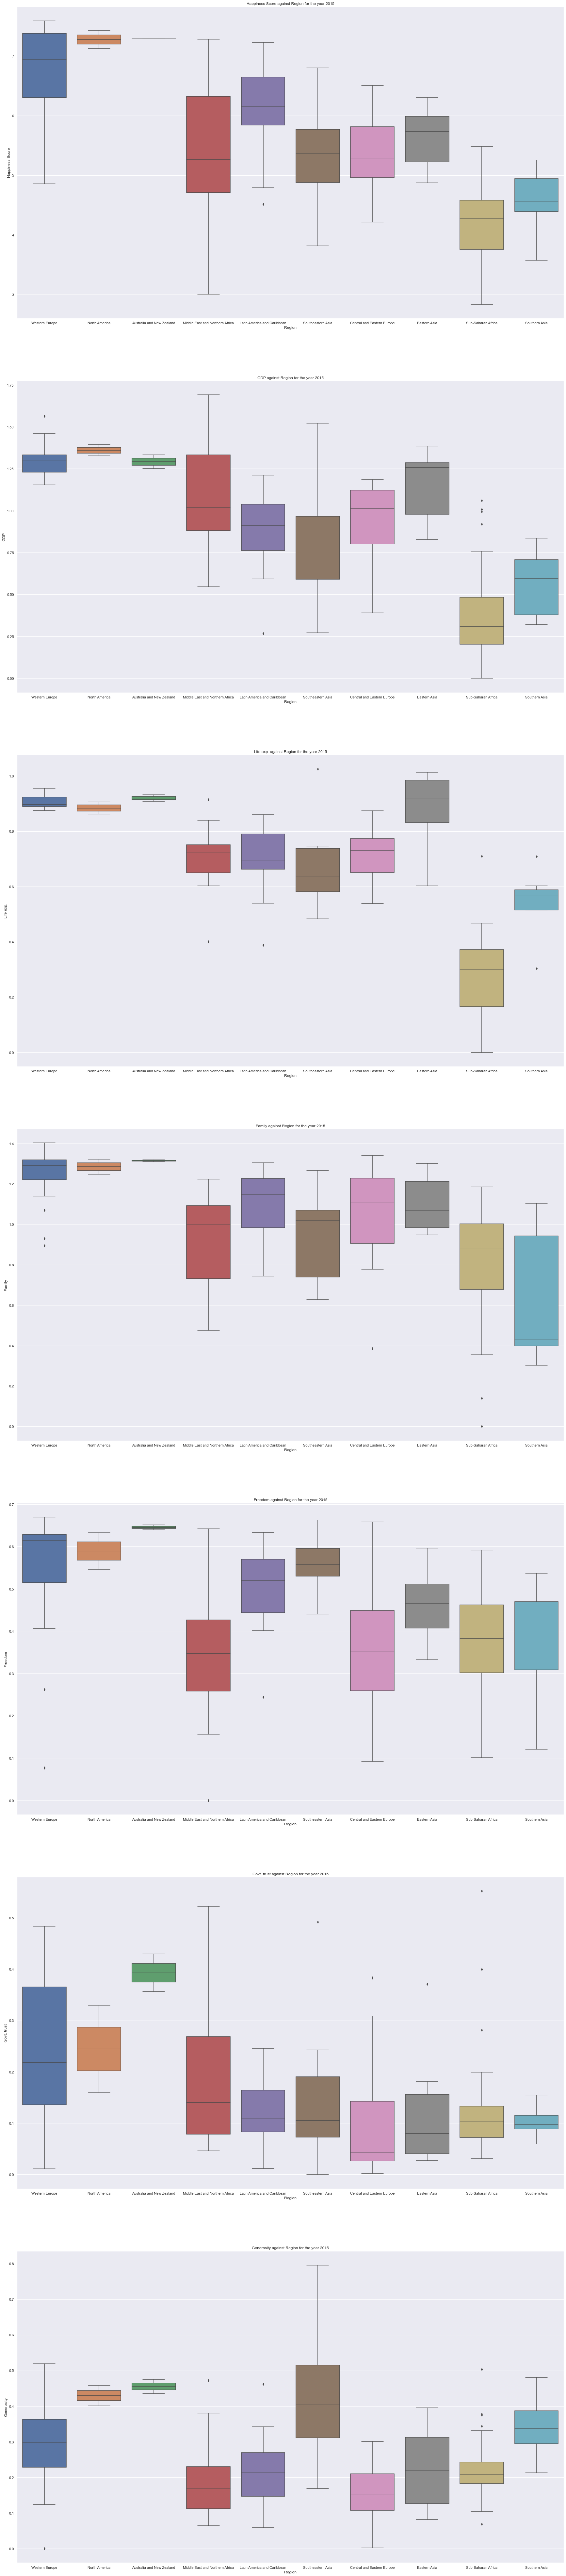

In [22]:
plot_year(2015)

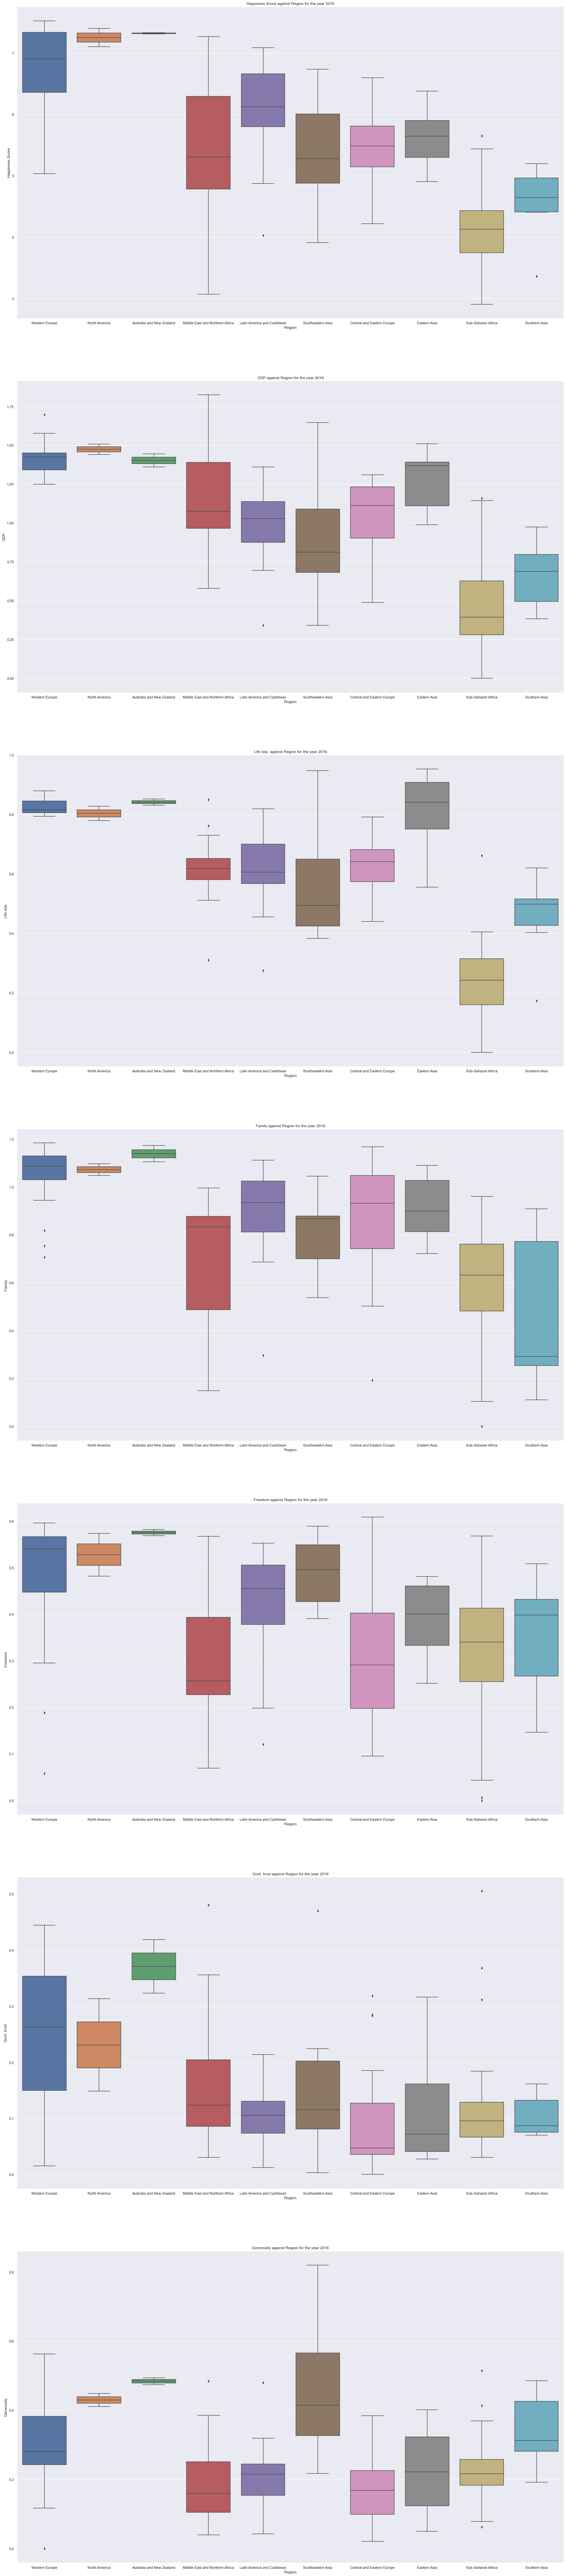

In [23]:
plot_year(2016)

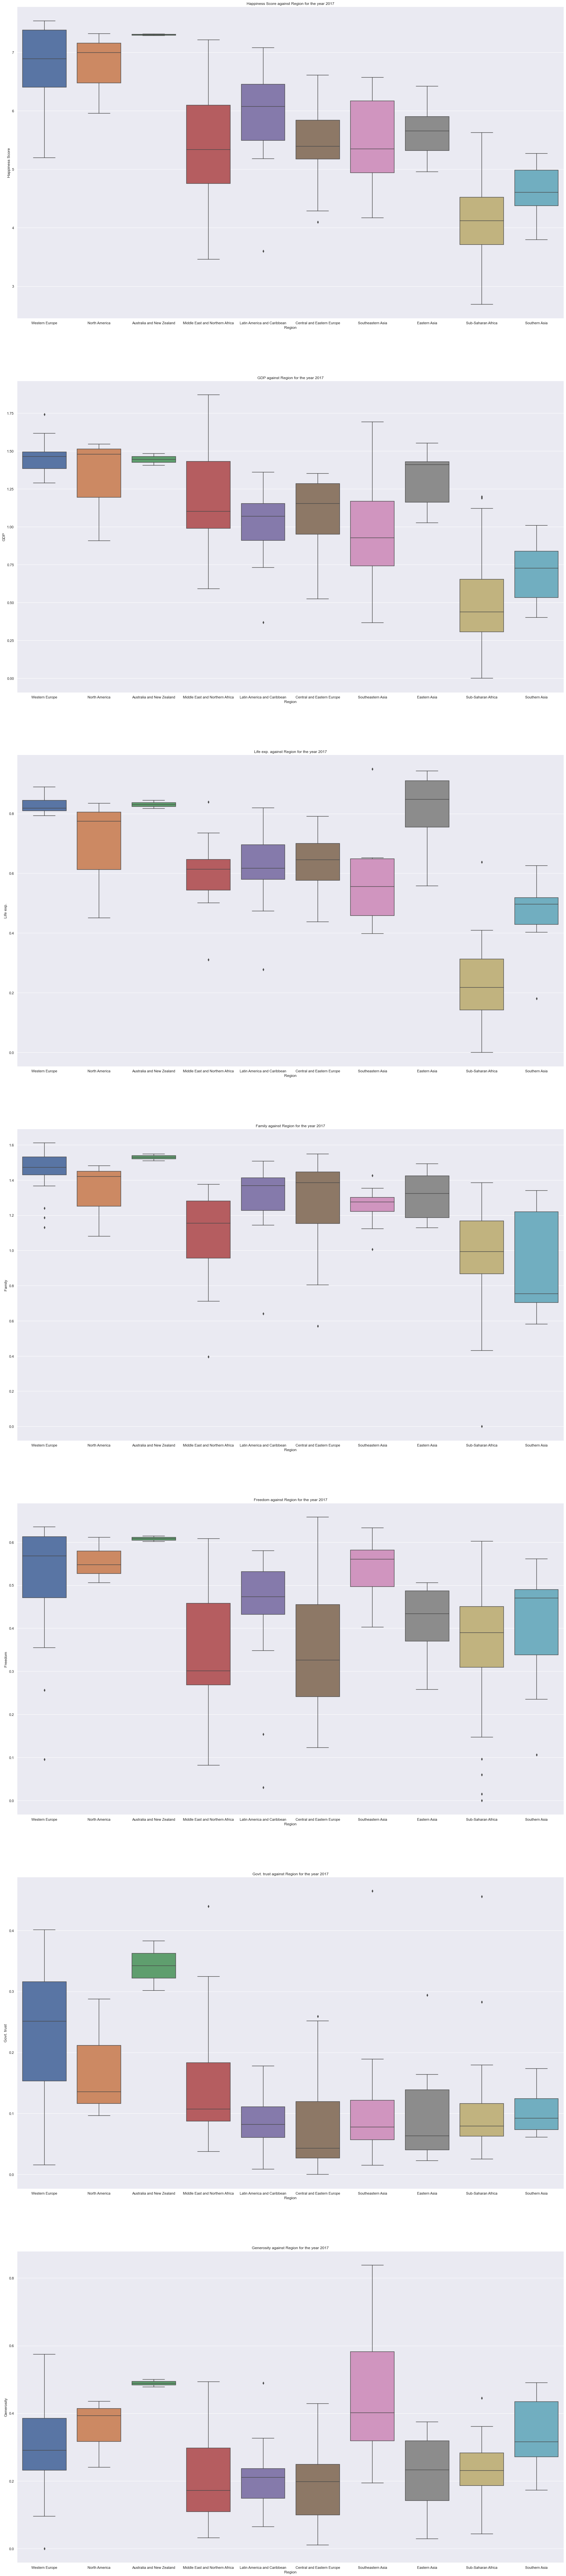

In [24]:
plot_year(2017)

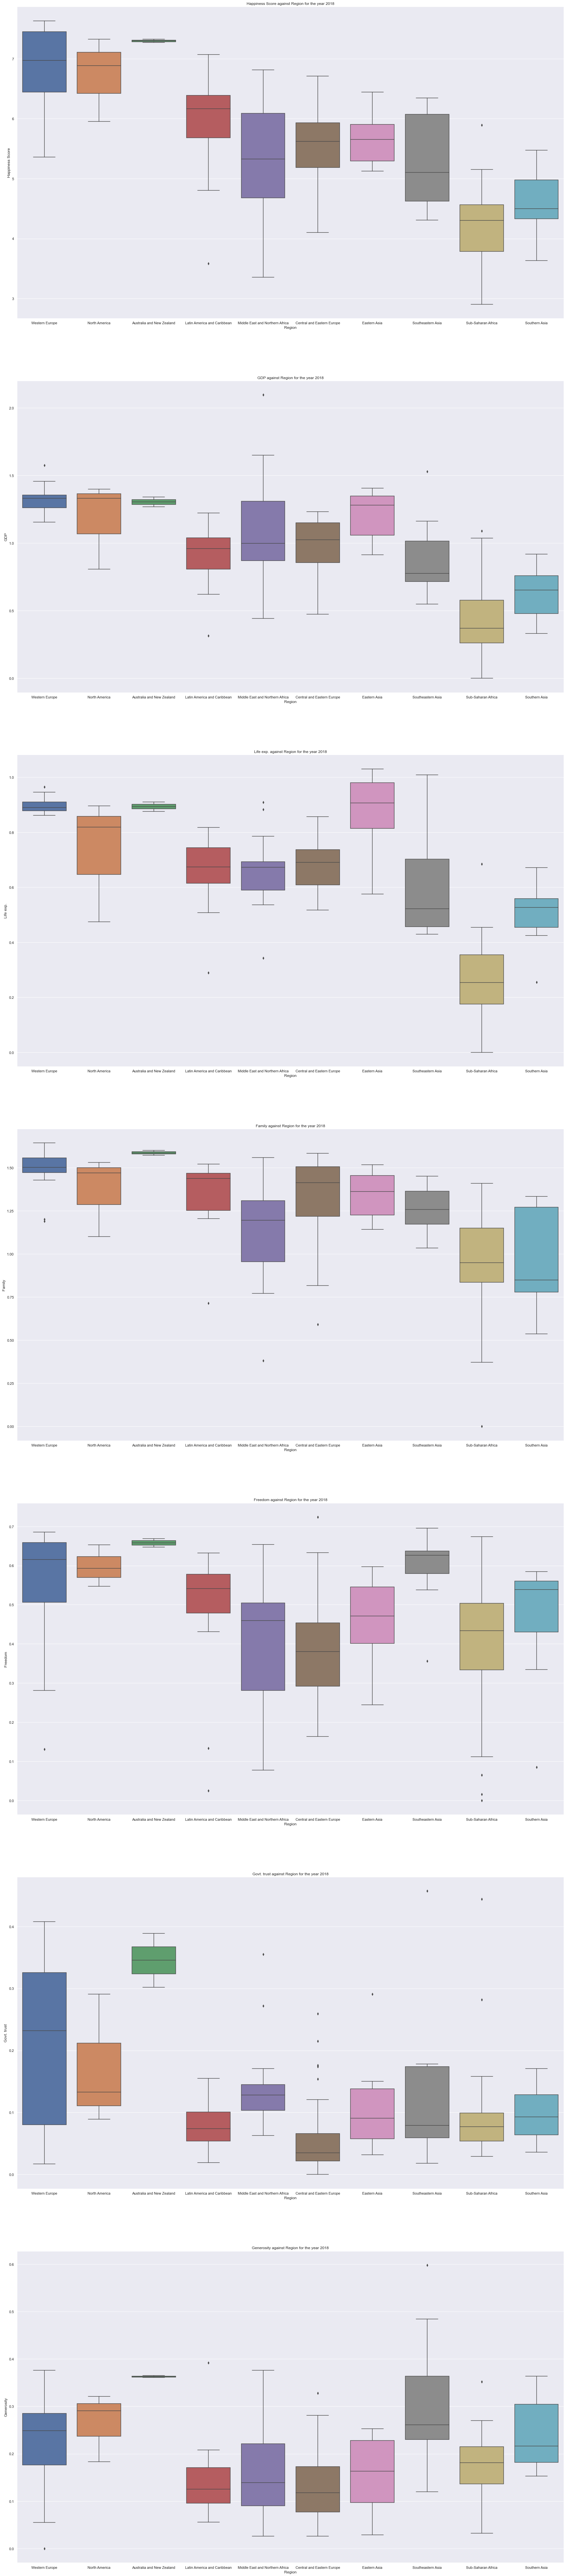

In [25]:
plot_year(2018)

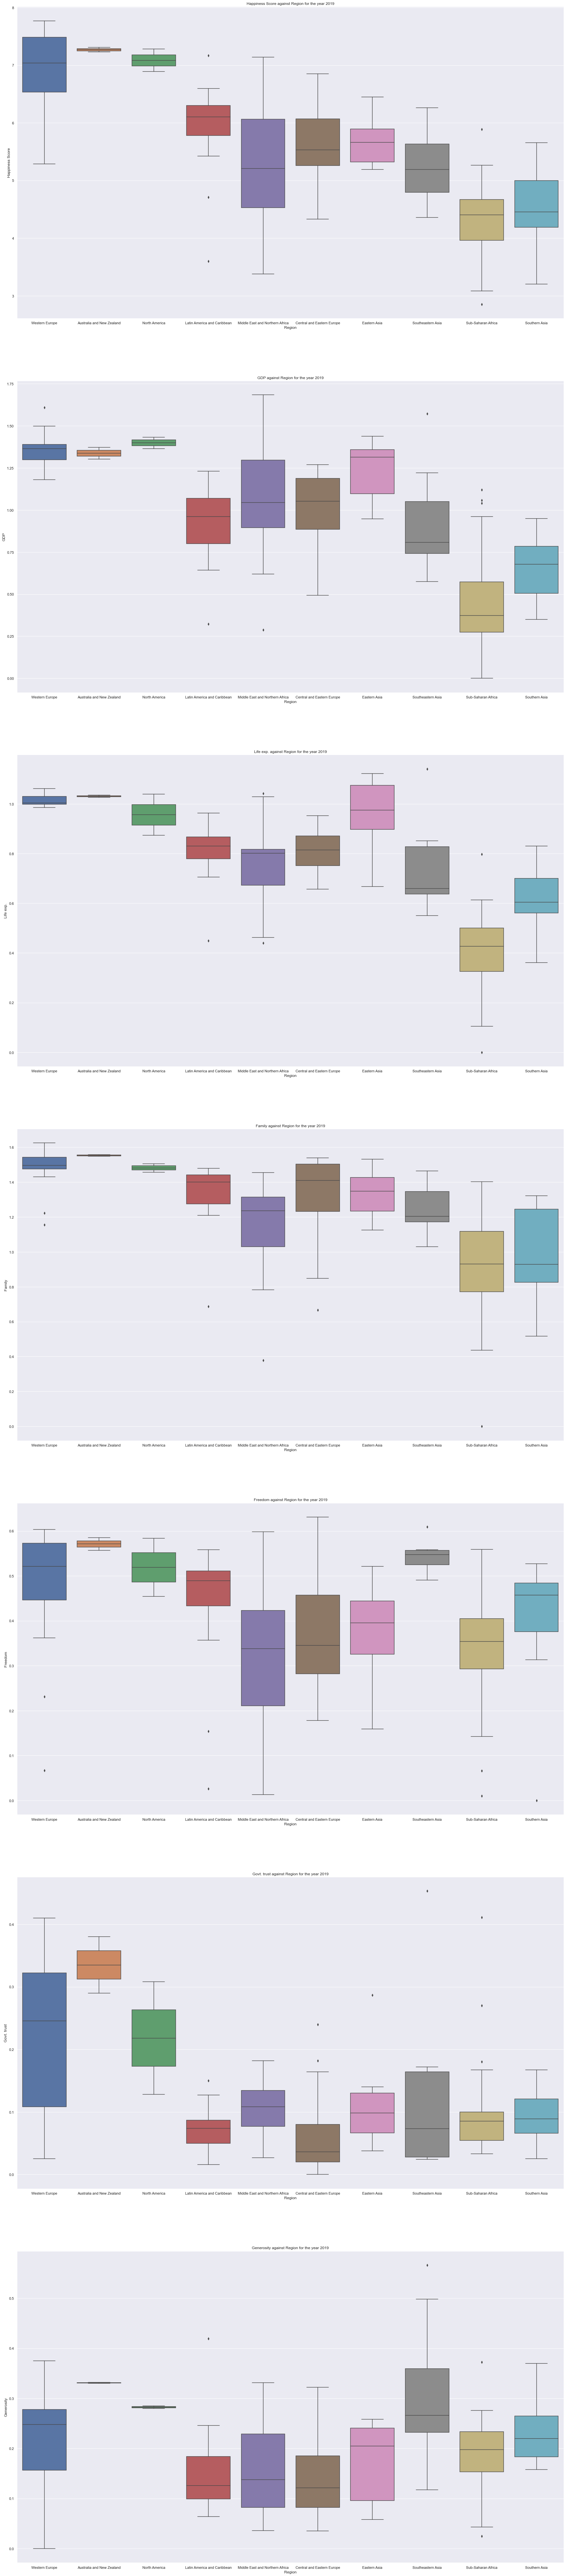

In [26]:
plot_year(2019)

## Top and bottom 10 happiest countries by year

In [27]:
def top_n_bot(x):
    bot_10 = data_clean[data_clean['Year'] == x][-10:]
    top_10 = data_clean[data_clean['Year'] == x][:10]
    hue_order = data_clean['Region'].unique()

    f, axes = plt.subplots(1, 2, figsize=(40, 15))
    sb.barplot(data = top_10, y = 'Happiness Score', x = 'Country', hue = 'Region', hue_order = hue_order, dodge = False, ax = axes[0])
    axes[0].set_title(f'Top 10 countries in {x}')
    sb.barplot(data = bot_10, y = 'Happiness Score', x = 'Country', hue = 'Region', hue_order = hue_order, dodge = False, ax = axes[1])
    axes[1].set_title(f'Bottom 10 countries in {x}')

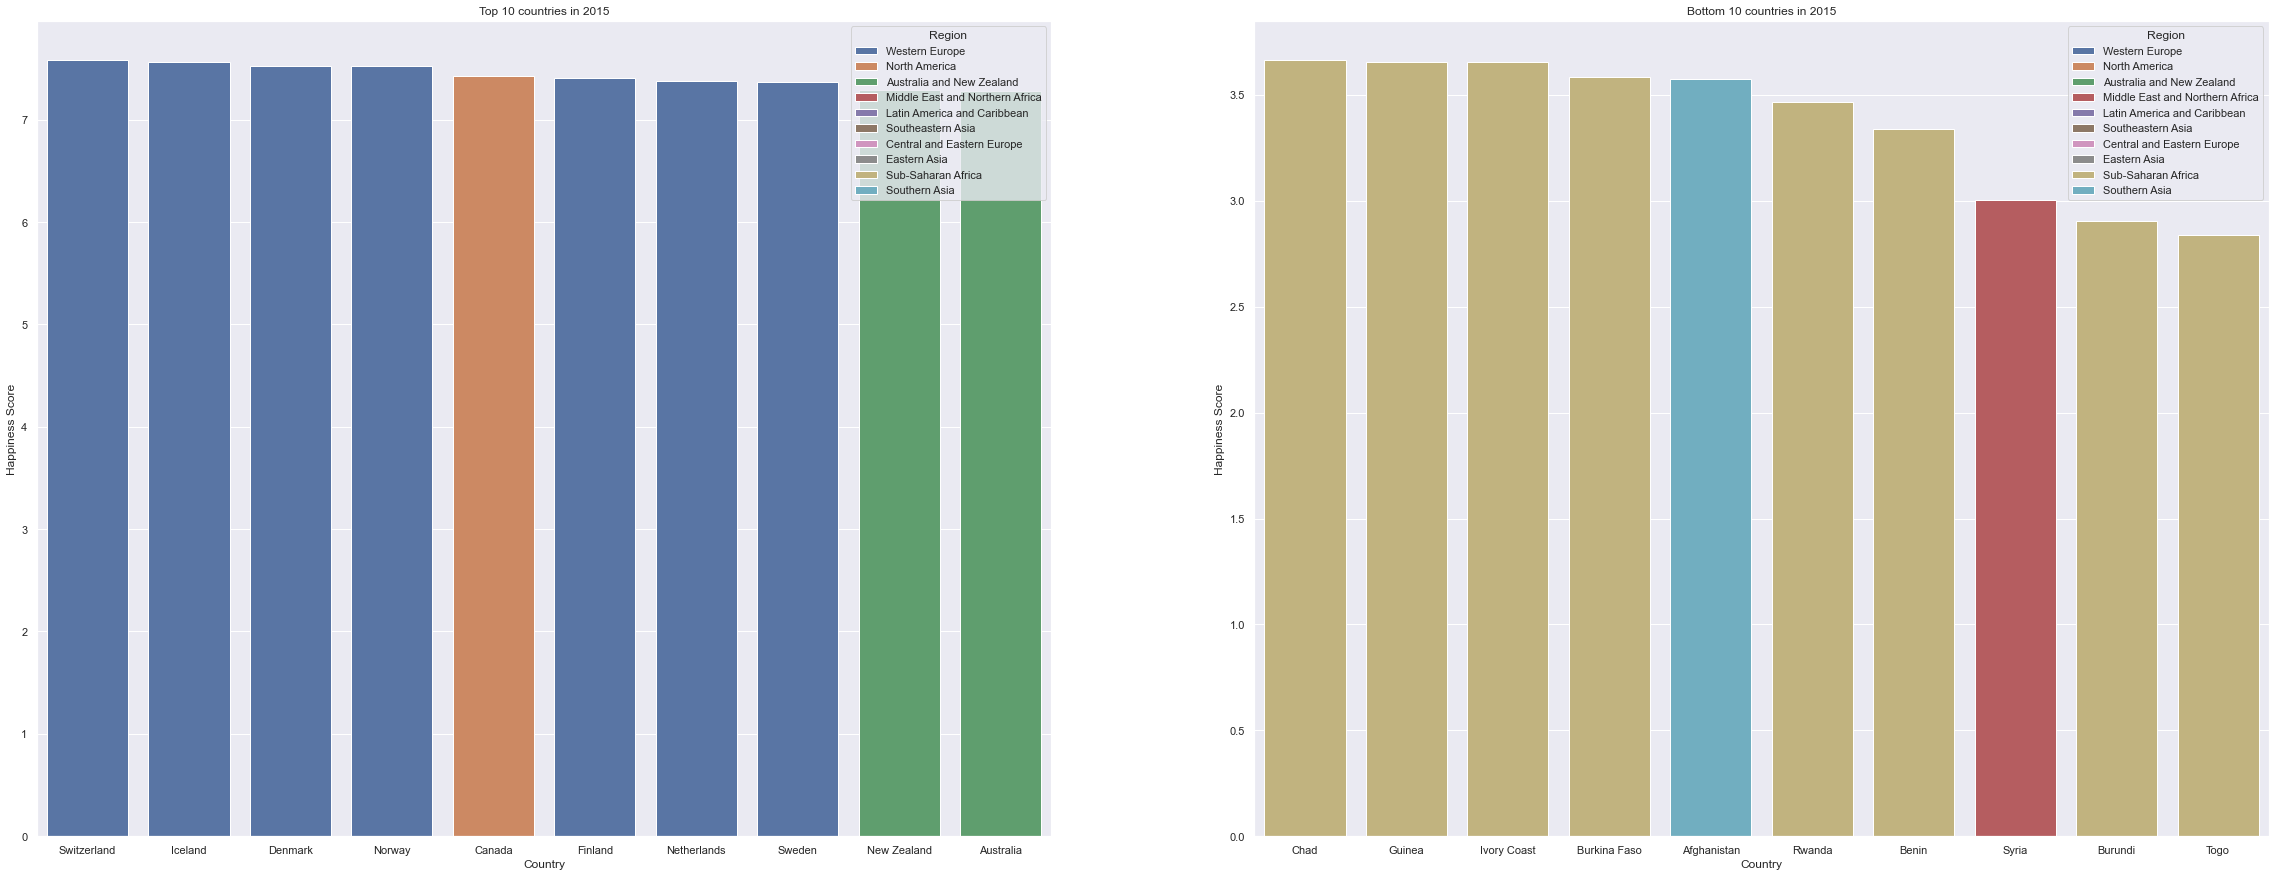

In [28]:
top_n_bot(2015)

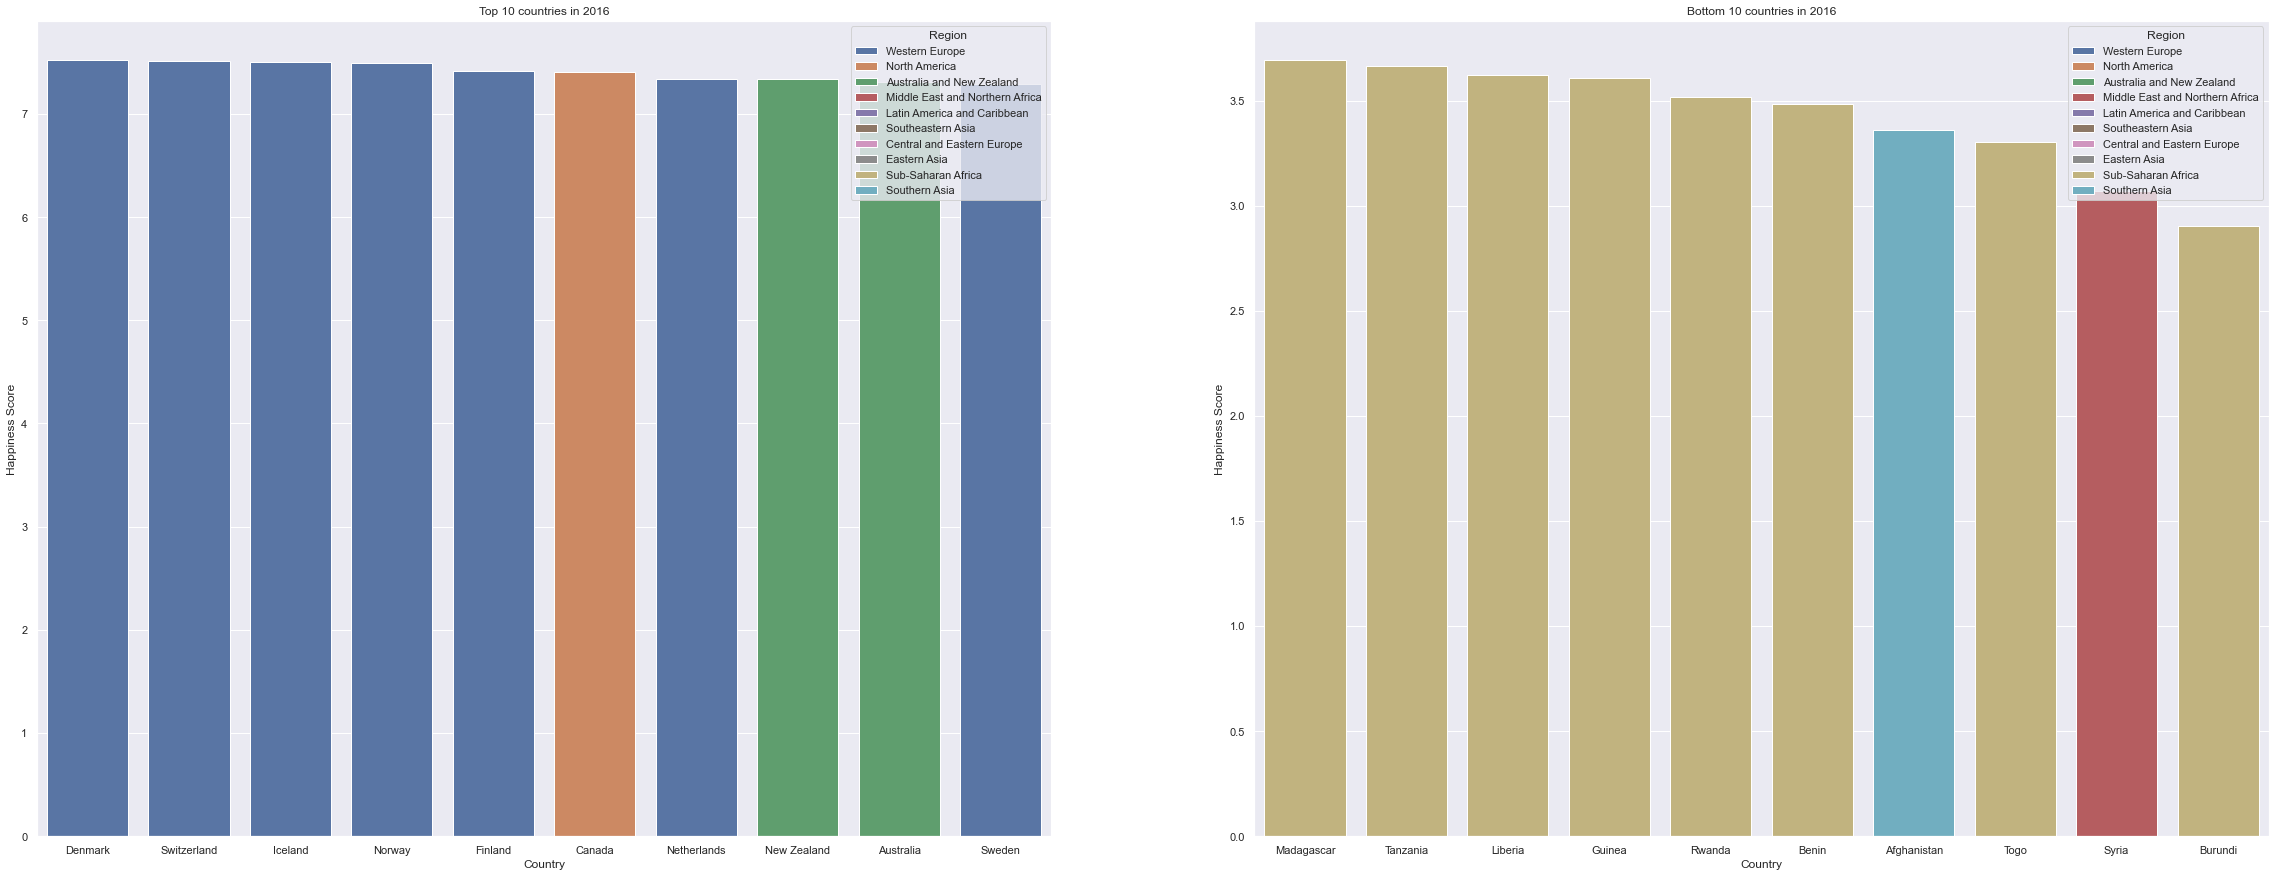

In [29]:
top_n_bot(2016)

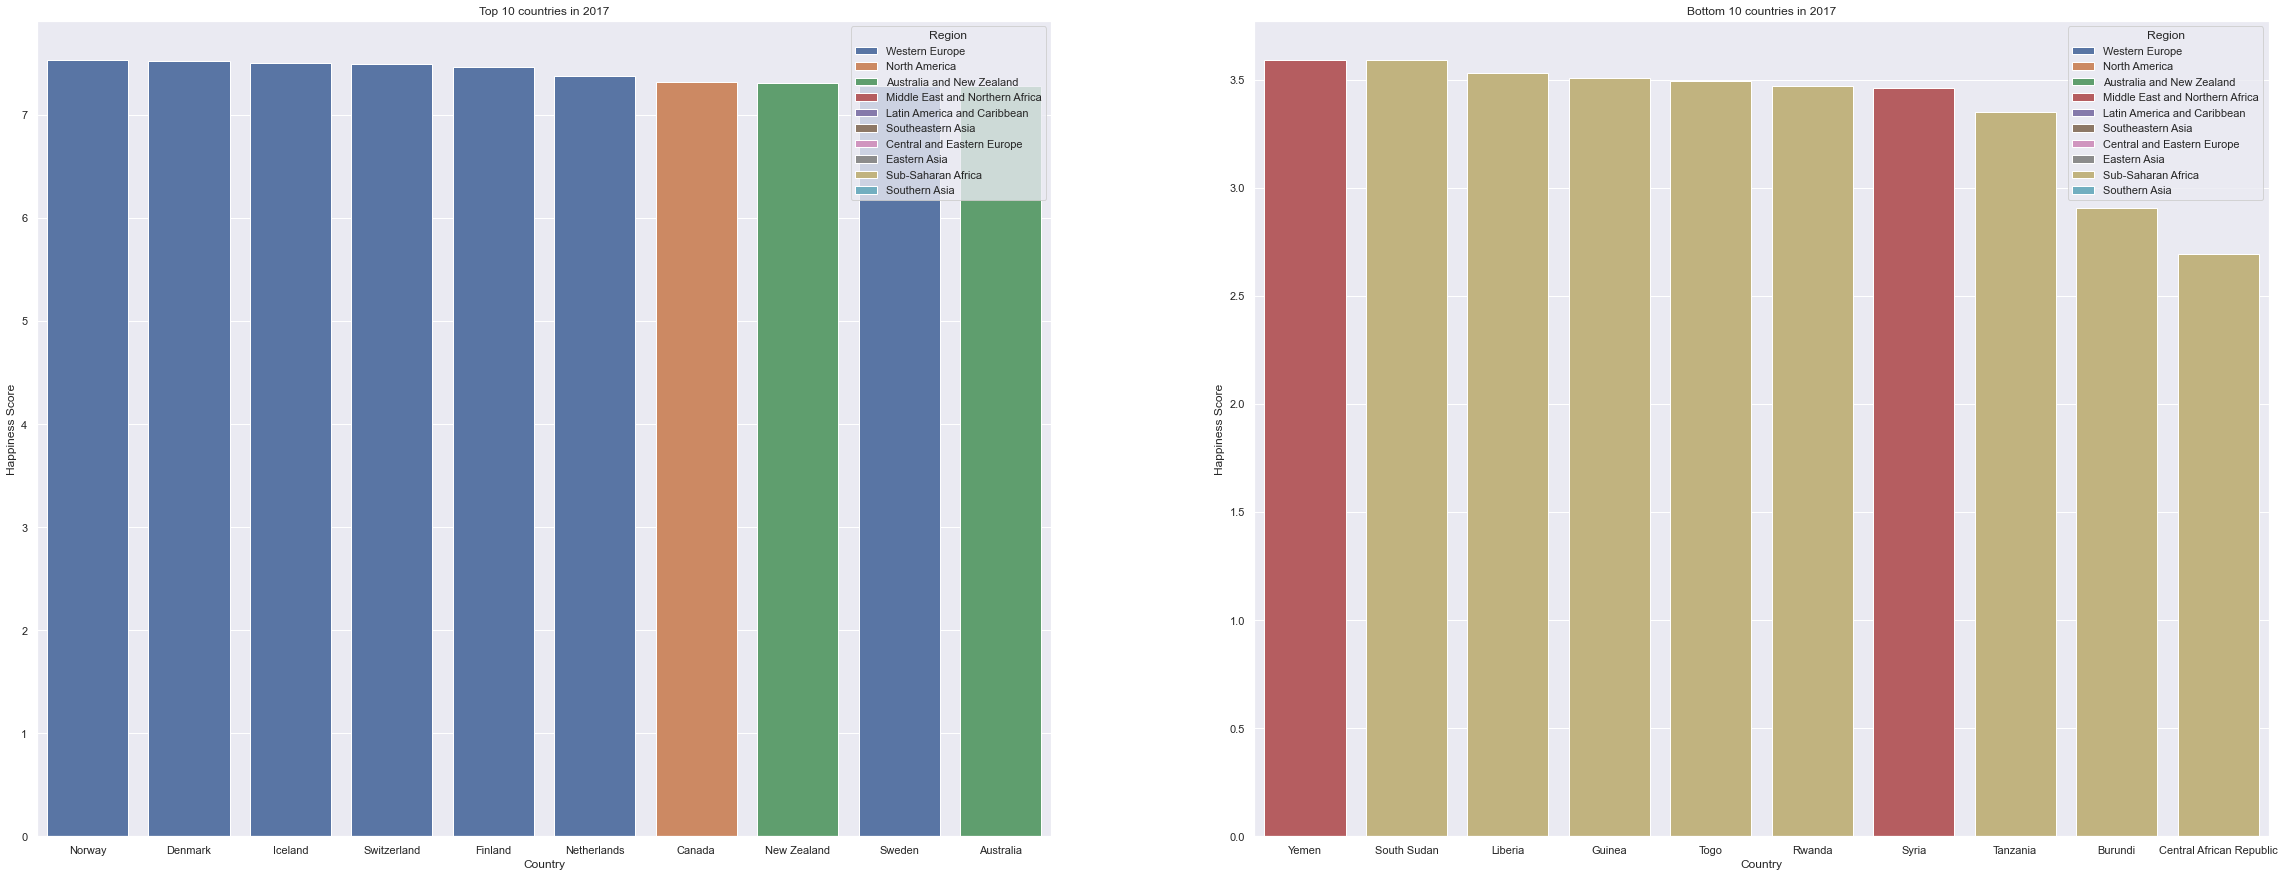

In [30]:
top_n_bot(2017)

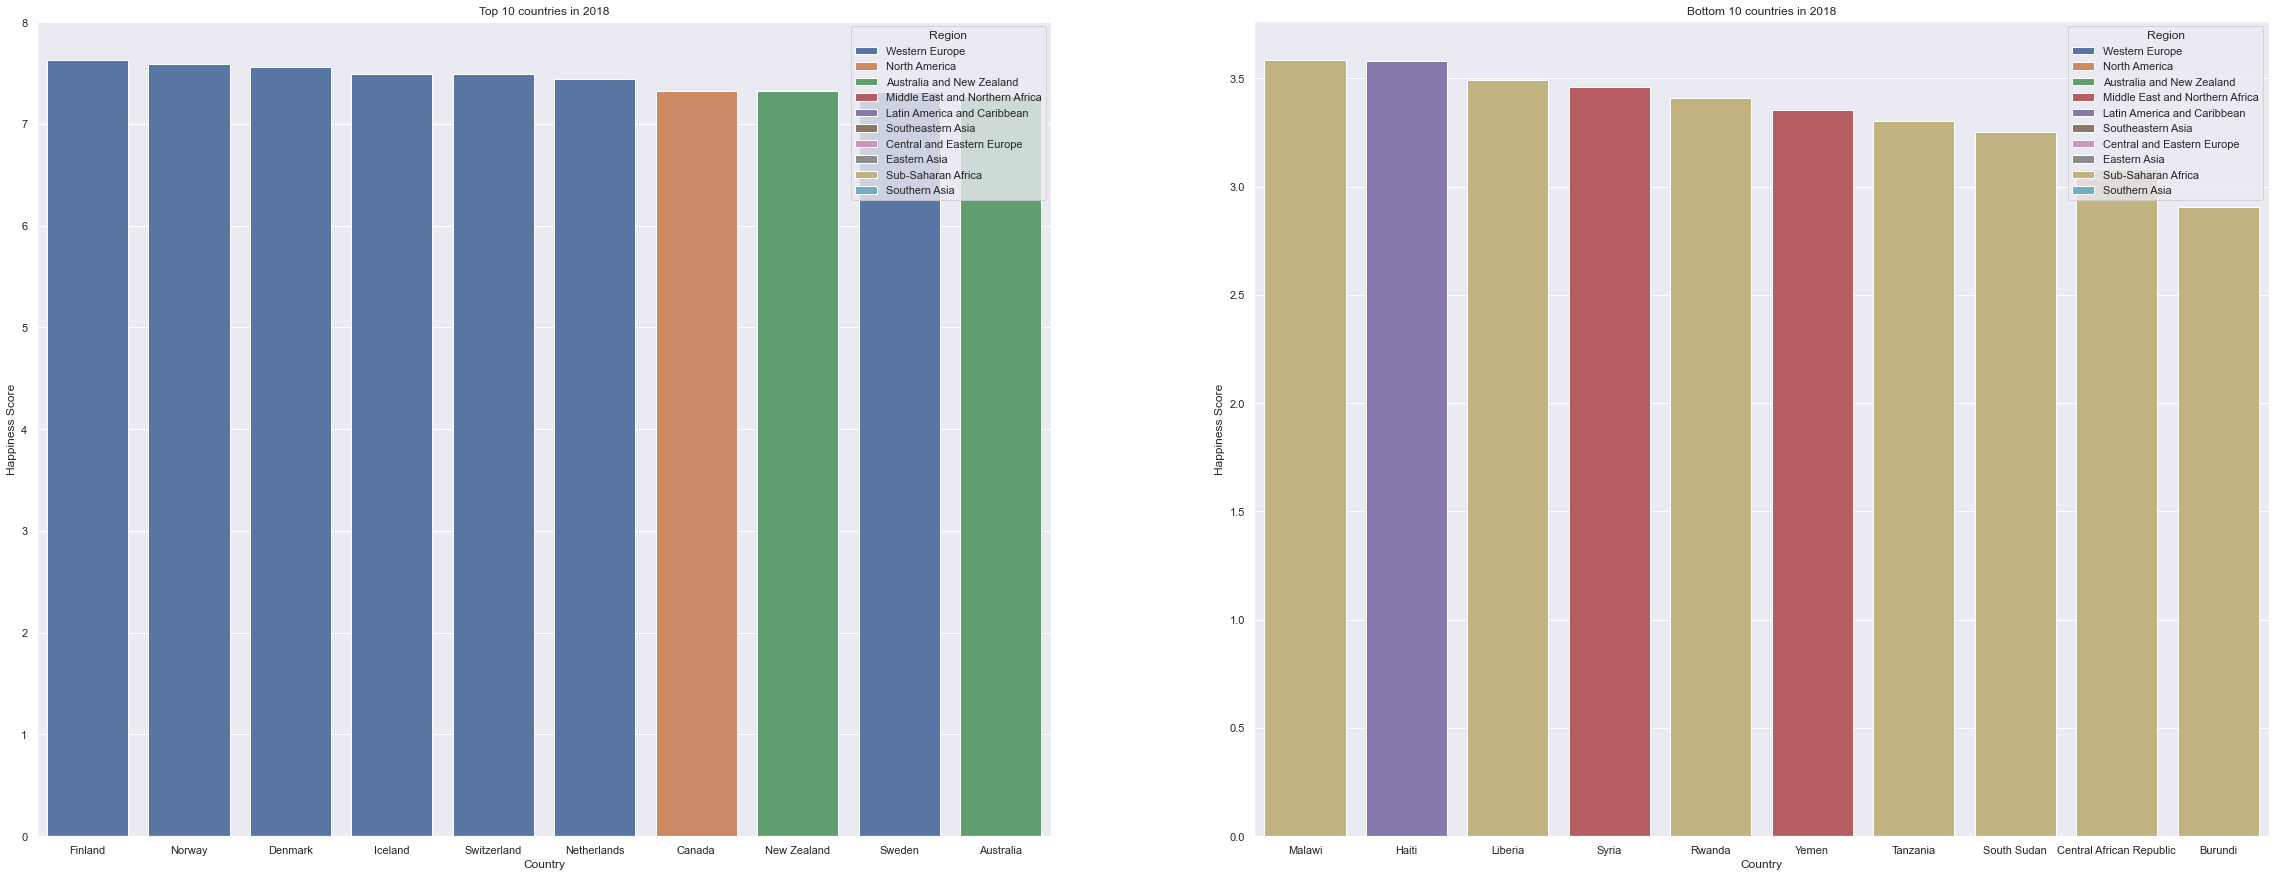

In [31]:
top_n_bot(2018)

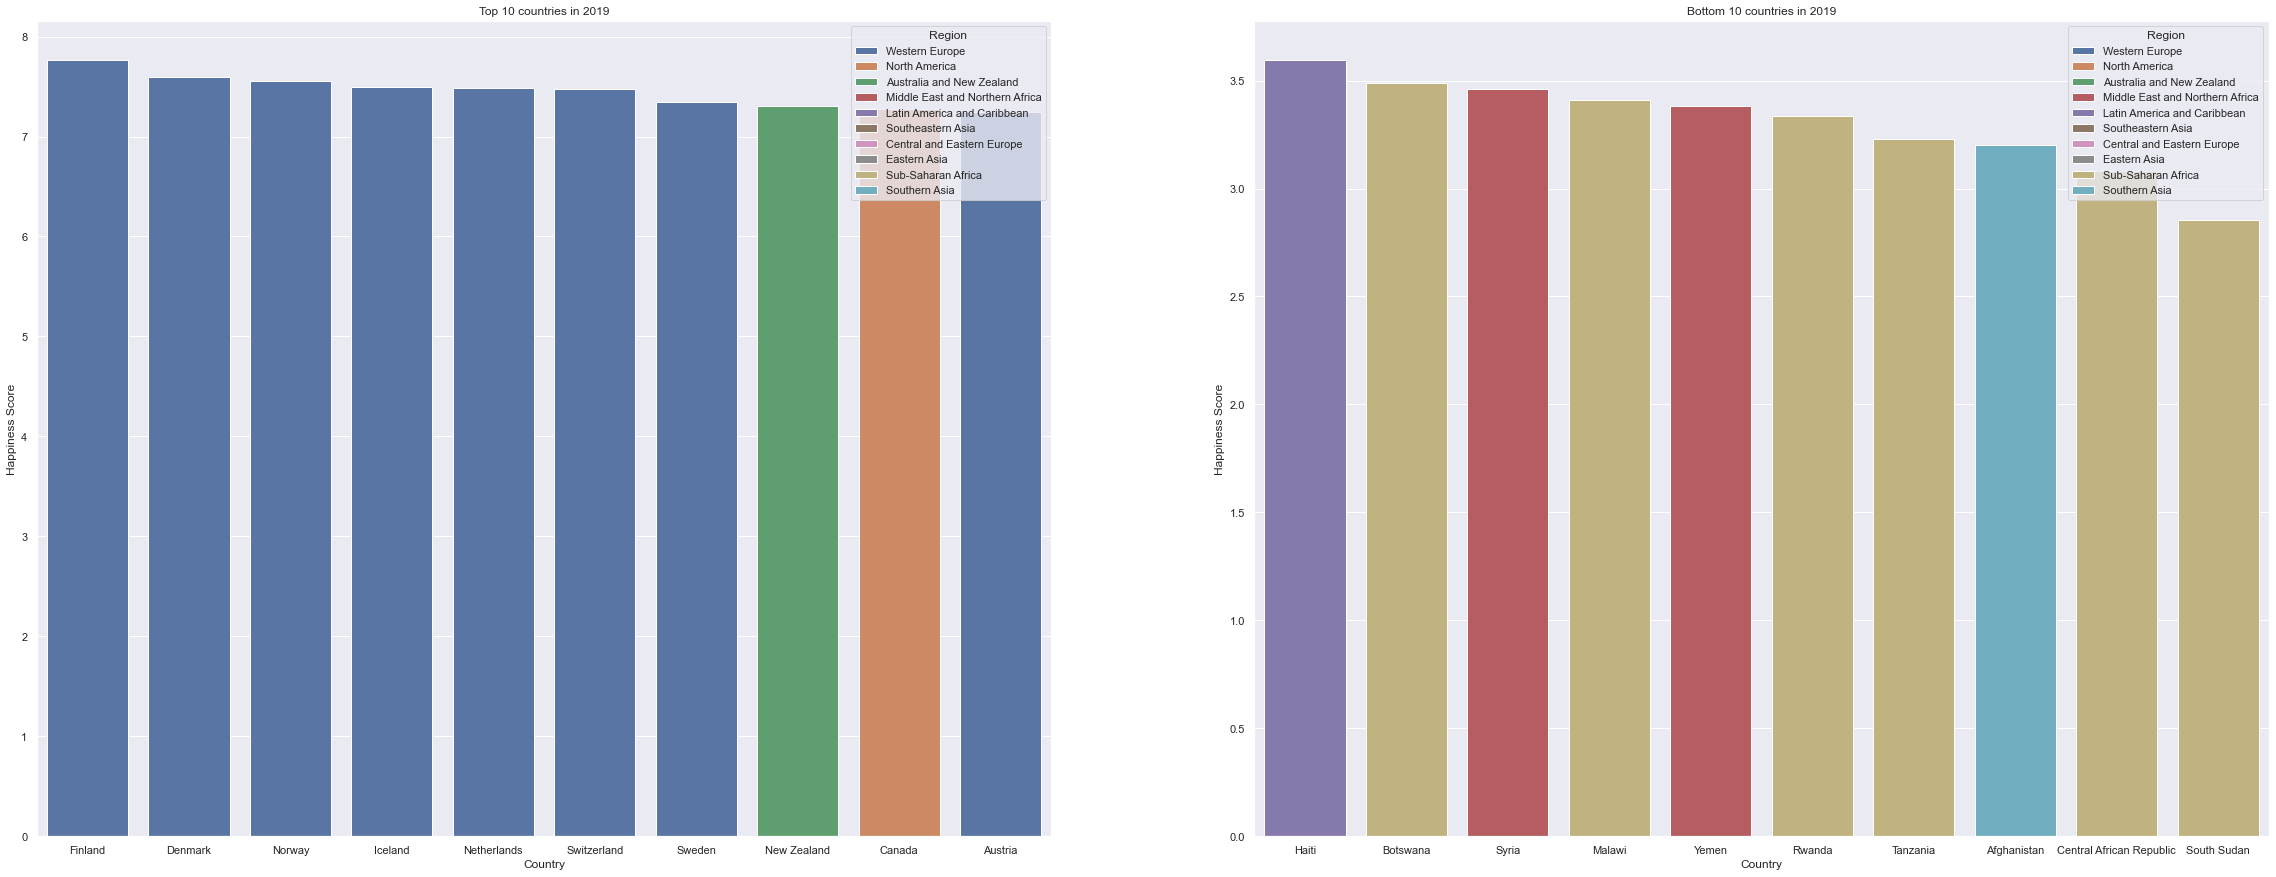

In [32]:
top_n_bot(2019)

## Change in Happiness Score over the years

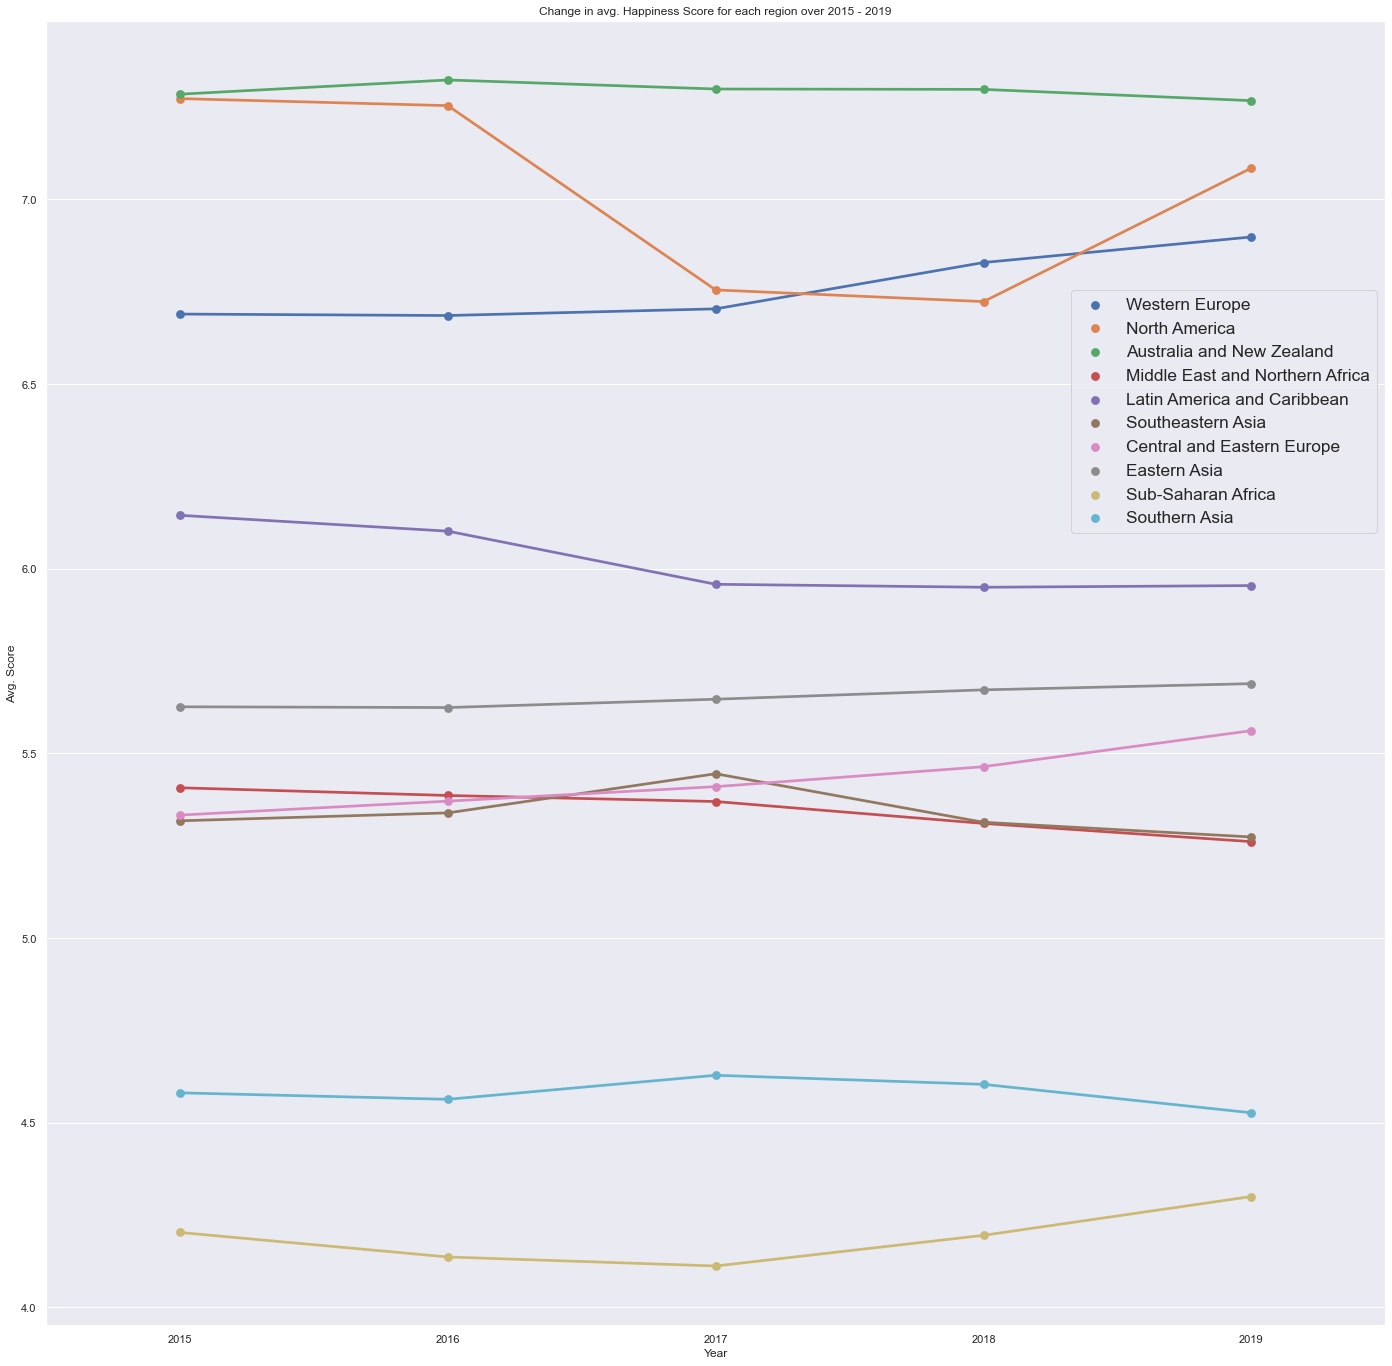

In [33]:
final_df = pd.DataFrame(data_clean['Region'].unique(), columns = ['Region'])
# iterating over each year
for j in range(5):
    avg_ar = []
    # iterating over each unique region
    for i in data_clean['Region'].unique():
        # extract the year data for each region separately
        year_data = data_clean[(data_clean['Region'] == i) & (data_clean['Year'] == 2015 + j)]
        # calculate the average happiness score and append to array
        avg_ar.append(np.average(year_data['Happiness Score']))
    # convert array into dataframe
    add_df = pd.DataFrame(avg_ar, columns = ['Avg. Score'])
    avg_ar.clear()
    # filling in the year and then concatenating with the final_df
    if j == 0:
        final_df = pd.concat([final_df, add_df], axis = 1)
        final_df['Year'] = None
        final_df.fillna('2015', inplace = True)
    else:
        s = pd.DataFrame(data_clean['Region'].unique(), columns = ['Region'])
        s = pd.concat([s, add_df], axis = 1)
        s['Year'] = None
        s['Year'].fillna(f'{2015 + j}', inplace = True)
        final_df = pd.concat([final_df, s], axis = 0)

f = plt.figure(figsize=(24, 24))
sb.pointplot(data = final_df, y = 'Avg. Score', x = 'Year', hue = 'Region', legend = 'full')
plt.title('Change in avg. Happiness Score for each region over 2015 - 2019')
# Modify positioning of legend
plt.legend(fontsize = 'x-large', loc = 1, bbox_to_anchor=(0.5, 0.3, 0.5, 0.5))

## World map representation of Happiness Score

In [34]:
pip install plotly==5.6.0

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [36]:
import plotly.express as px

In [37]:
def hap_world_map(year):
    temp = data_clean[data_clean['Year'] == year]
    fig = px.choropleth(temp, locations='Country', locationmode = 'country names', color='Happiness Score',
                        color_continuous_scale="icefire",
                        range_color=(0, 10),
                        projection = 'natural earth',
                        title = f'World Happiness Score for {year}'
                        )
    # Unable to render embedded html on Github
    fig.show(renderer="png")

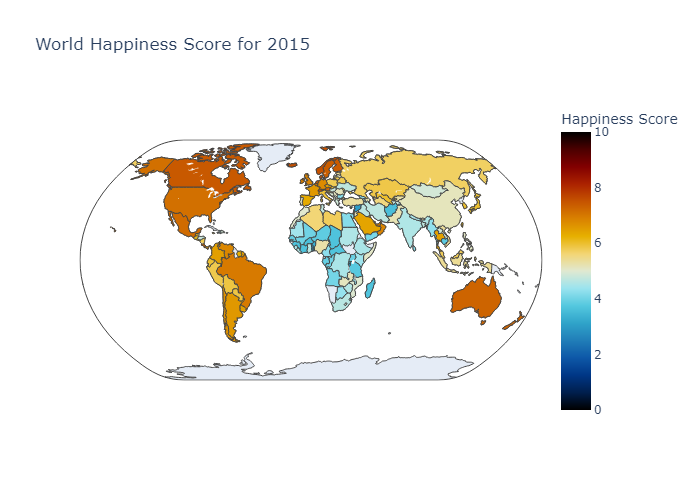

In [38]:
hap_world_map(2015)

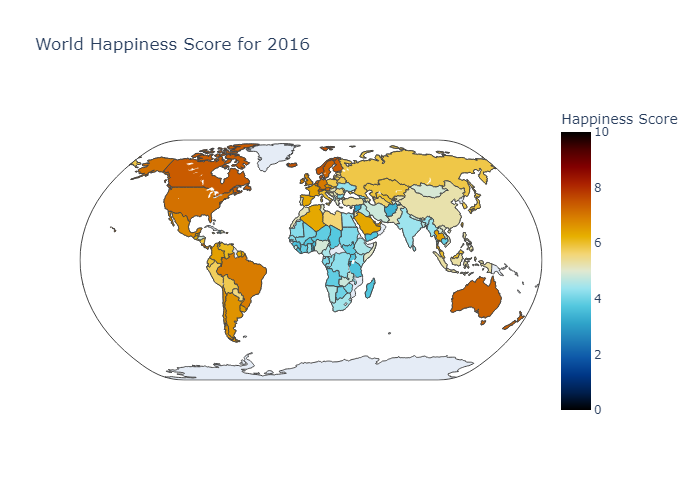

In [39]:
hap_world_map(2016)

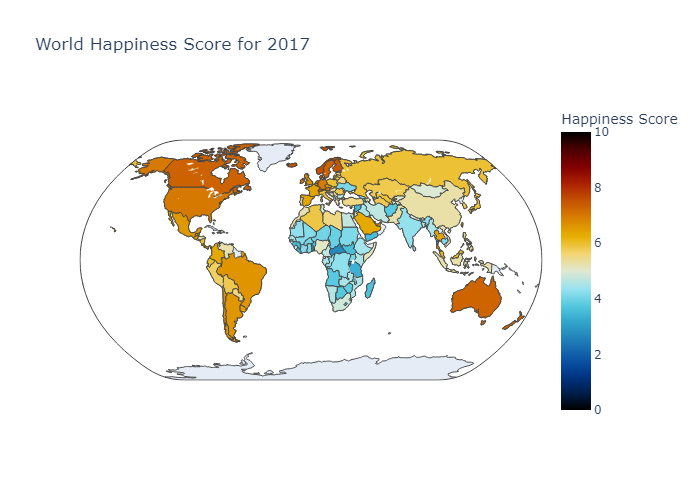

In [40]:
hap_world_map(2017)

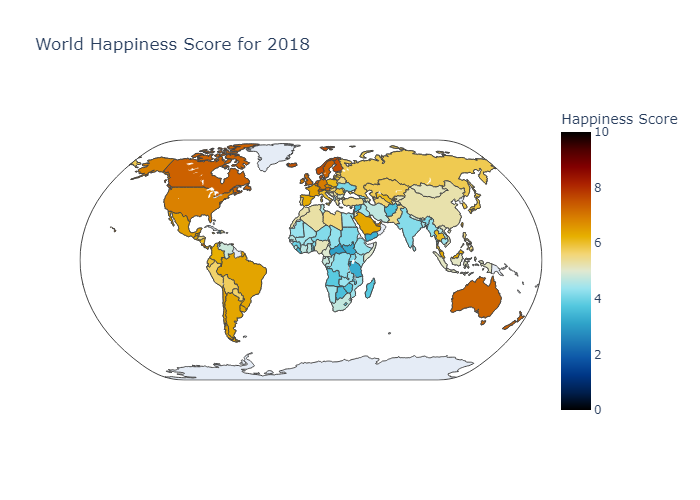

In [41]:
hap_world_map(2018)

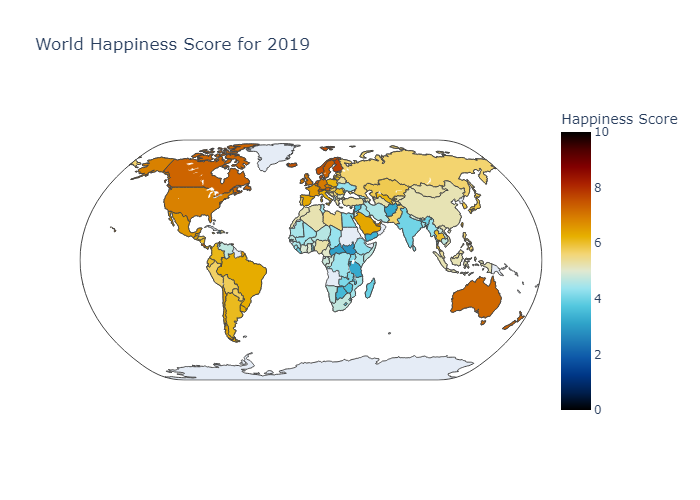

In [42]:
hap_world_map(2019)

#### Reference:
https://plotly.com/python/choropleth-maps/ <br>
https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html

#### General observations:
<ul>
    <li> Nordic countries, NA, Western Europe, Australia and New Zealand have the highest happiness scores
    <li> Almost all of the Middle East and Africa have relatively low happiness scores, main outlier is Saudi Arabia
    <li> Asian countries seem to be on the lower end of the spectrum of happiness scores, averaging around 4 - 5
    <li> Countries in SA seem to be on the higher end of the spectrum of happiness scores, averaging around 5 - 6
</ul>

# Machine Learning

In [43]:
# Importing necessary libraries for regression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


le = preprocessing.LabelEncoder()
linreg = LinearRegression()

In [44]:
# Encoding labels - mapping each unique region and country to a unique numeric value so that linreg can be done
data_num = data_clean.copy()
data_num['Region'] = le.fit_transform(data_num['Region'])
data_num['Country'] = le.fit_transform(data_num['Country'])

## Multivariate linear regression

In [45]:
# Defining the predictors
predictors = ['Country','Region','GDP','Family','Life exp.','Freedom','Govt. trust','Generosity']

# Defining datasets for predictors and response
X = data_num[predictors]
y = data_num['Happiness Score'] 

Intercept: 2.252434893157611
Coefficients: [-4.91877257e-04 -4.50957553e-03  1.04519903e+00  6.81524994e-01
  1.01964693e+00  1.47385118e+00  1.26109366e+00  5.01837911e-01]


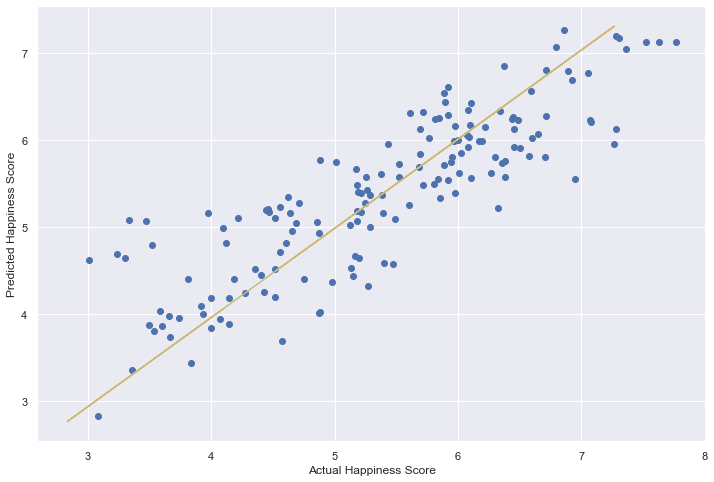

Explained Variance(R^2) on train set: 0.7718471523536083
Explained Variance(R^2) on test set:: 0.7322808018839213
Mean Squared Error (MSE) 	: 0.3256478011853683
Root Mean Squared Error (RMSE) 	: 0.5706555889372926


In [46]:
# Splitting train and test data randomly, random_state set to 42 to produce same results across different calls
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Training the model
linreg.fit(X_train, y_train)

# Coefficients of linear regression model
print('Intercept:', linreg.intercept_)
print("Coefficients:", linreg.coef_)

# Predicting test values using model
y_test_pred = linreg.predict(X_test)
f = plt.figure(figsize=(12, 8))

plt.scatter(y_test, y_test_pred)
# Finding best-fit line to represent actual value against predicted value 
a, b = np.polyfit(y_test_pred, y_test, 1)
plt.plot(y_test_pred, (a * y_test_pred + b), color = 'y')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.show()

# Goodness of fit of model
print('Explained Variance(R^2) on train set:', linreg.score(X_train, y_train))
print('Explained Variance(R^2) on test set::', linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

## Recurrent Neural Network

In [47]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [48]:
import math
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## ! Note: The code below till the next markdown bar is purely for testing how LSTM code works

In [49]:
x = data_clean['Country'].unique()
print(x[0])

Switzerland


In [50]:
rnn_test = data_clean[data_clean['Country'] == x[0]]
rnn_test = rnn_test[['Happiness Score', 'GDP','Family','Life exp.','Freedom','Govt. trust','Generosity', 'Year']]
display(rnn_test)
print(rnn_test.shape)
rnn_test = rnn_test.values
rnn_test = rnn_test.astype('float32')

,,Happiness Score,GDP,Family,Life exp.,Freedom,Govt. trust,Generosity,Year
0,0,7.587,1.39651,1.349510,0.941430,0.665570,0.419780,0.296780,2015
1,1,7.509,1.52733,1.145240,0.863030,0.585570,0.412030,0.280830,2016
2,3,7.494,1.56498,1.516912,0.858131,0.620071,0.367007,0.290549,2017
3,4,7.487,1.42000,1.549000,0.927000,0.660000,0.357000,0.256000,2018
4,5,7.480,1.45200,1.526000,1.052000,0.572000,0.343000,0.263000,2019


(5, 8)


In [51]:
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(rnn_test)
rnn_test_scaled = scaler.transform(rnn_test)

In [52]:
trainX = []
trainY = []

n_future = 1   # No. of year(s) to predict into the future
n_past = 3   # No. of past year(s) to use for the prediction


for i in range(n_past, len(rnn_test_scaled) - n_future + 1):
    trainX.append(rnn_test_scaled[i - n_past:i, 0:rnn_test.shape[1]])
    trainY.append(rnn_test_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

print(trainY)

trainX shape == (2, 3, 8).
trainY shape == (2, 1).
[[-0.62563205]
 [-0.8051163 ]]


In [53]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(32, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                5248      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5,281
Trainable params: 5,281
Non-trainable params: 0
_________________________________________________________________


In [54]:
history = model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
2/2 - 1s - loss: 0.5621 - 996ms/epoch - 498ms/step
Epoch 2/50
2/2 - 0s - loss: 0.5132 - 7ms/epoch - 3ms/step
Epoch 3/50
2/2 - 0s - loss: 0.4612 - 5ms/epoch - 3ms/step
Epoch 4/50
2/2 - 0s - loss: 0.4131 - 4ms/epoch - 2ms/step
Epoch 5/50
2/2 - 0s - loss: 0.3602 - 5ms/epoch - 2ms/step
Epoch 6/50
2/2 - 0s - loss: 0.3195 - 4ms/epoch - 2ms/step
Epoch 7/50
2/2 - 0s - loss: 0.2814 - 5ms/epoch - 3ms/step
Epoch 8/50
2/2 - 0s - loss: 0.2554 - 5ms/epoch - 3ms/step
Epoch 9/50
2/2 - 0s - loss: 0.2124 - 4ms/epoch - 2ms/step
Epoch 10/50
2/2 - 0s - loss: 0.1928 - 4ms/epoch - 2ms/step
Epoch 11/50
2/2 - 0s - loss: 0.1557 - 5ms/epoch - 3ms/step
Epoch 12/50
2/2 - 0s - loss: 0.1326 - 4ms/epoch - 2ms/step
Epoch 13/50
2/2 - 0s - loss: 0.1123 - 4ms/epoch - 2ms/step
Epoch 14/50
2/2 - 0s - loss: 0.0945 - 4ms/epoch - 2ms/step
Epoch 15/50
2/2 - 0s - loss: 0.0793 - 5ms/epoch - 3ms/step
Epoch 16/50
2/2 - 0s - loss: 0.0663 - 5ms/epoch - 3ms/step
Epoch 17/50
2/2 - 0s - loss: 0.0622 - 4ms/epoch - 2ms/step
Ep

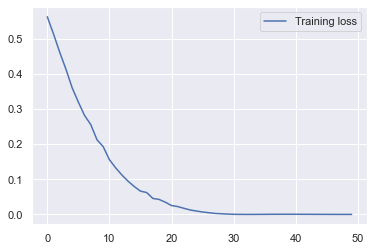

In [55]:
plt.plot(history.history['loss'], label='Training loss')
plt.legend()

### The graph levels off at around 20 epochs, will set it to 20 for the function

In [56]:
forecast = model.predict(trainX)

In [57]:
forecast_copies = np.repeat(forecast, rnn_test.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]
print(y_pred_future)
print(type(y_pred_future))

[7.487037  7.4797983]
<class 'numpy.ndarray'>


In [58]:
# Goodness of fit
y_test = pd.DataFrame(rnn_test, columns = ['Happiness Score', 'GDP','Family','Life exp.','Freedom','Govt. trust','Generosity', 'Year'])['Happiness Score'][3:]
display(y_test)
display(y_pred_future)
MSE = mean_squared_error(y_test, y_pred_future)
print(type(MSE))
print("Mean squared error: \t", mean_squared_error(y_test, y_pred_future))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_pred_future)))

3    7.487
4    7.480
Name: Happiness Score, dtype: float32

array([7.487037 , 7.4797983], dtype=float32)

<class 'numpy.float32'>
Mean squared error: 	 2.1033543e-08
Root mean squared error:  0.00014502945


## ! End of testing part

In [59]:
# Function to do rnn based time series forecasting for 1 country at a time
def rnn_pred(country, n_past, n_future):
    rnn_test = data_clean[data_clean['Country'] == country]
    rnn_test = rnn_test[['Happiness Score', 'GDP','Family','Life exp.','Freedom','Govt. trust','Generosity', 'Year']]
    # Certain countries are missing for different years, so we just ignore them
    if(rnn_test.shape[0] != 5):
        print(f"Error, missing data for {country}")
        return -1
    rnn_test = rnn_test.values
    rnn_test = rnn_test.astype('float32')
        
    scaler = StandardScaler()
    scaler = scaler.fit(rnn_test)
    rnn_test_scaled = scaler.transform(rnn_test)
    trainX = []
    trainY = []

    for i in range(n_past, len(rnn_test_scaled) - n_future + 1):
        trainX.append(rnn_test_scaled[i - n_past:i, 0:rnn_test.shape[1]])
        trainY.append(rnn_test_scaled[i + n_future - 1:i + n_future, 0])

    trainX, trainY = np.array(trainX), np.array(trainY)

    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(32, input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dense(trainY.shape[1]))

    model.compile(optimizer='adam', loss='mse')

    history = model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

    forecast = model.predict(trainX)

    forecast_copies = np.repeat(forecast, rnn_test.shape[1], axis=-1)
    y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]
    # print(y_pred_future)

    # Goodness of fit
    y_test = pd.DataFrame(rnn_test, columns = ['Happiness Score', 'GDP','Family','Life exp.','Freedom','Govt. trust','Generosity', 'Year'])['Happiness Score'][3:]
    #print("Country: ", country)
    #print("Mean squared error: \t", mean_squared_error(y_test, y_pred_future))
    #print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_pred_future)))
    return mean_squared_error(y_test, y_pred_future)

In [60]:
# Finds the min. and max. MSE for each region
def find_reg_mse(reg):
    # Getting the subset of data_clean where it's 1 specific region
    test = data_clean[data_clean['Region'] == reg]
    # Getting the list of UNIQUE countries in that region
    coun = test['Country'].unique()
    # Initialising values to store min. MSE, max. MSE and countries skipped
    min_err = max_err = 0
    missing = 0
    for i in coun:
        MSE = rnn_pred(i, 3, 1)   # using past 3 years of datasets to predict 'next' year's
        # rnn_pred returns -1 if country data is not found in a particular year, update 'missing' and continue
        if(MSE == -1):
            missing += 1
            continue
        # updating min_err and max_err based on the MSEs acquired from each country
        if(min_err == max_err and min_err == 0):
            min_err = max_err = MSE
        elif min_err > MSE:
            min_err = MSE
        elif max_err < MSE:
            max_err = MSE
    #print("Region: ", reg)
    #print("Max MSE: ", max_err)
    #print("Min MSE: ", min_err)
    return [min_err, max_err, len(coun), missing]

In [61]:
# Getting a list of all UNIQUE regions used
reg = data_clean['Region'].unique()
# min. MSE, max. MSE, total no. of countries and countries skipped will be stored in this reg_dict
reg_dict = {}
# Note that this WILL take awhile - ~5 mins I think
for i in reg:
    reg_dict[i] = find_reg_mse(i)

Epoch 1/20
2/2 - 1s - loss: 0.5091 - 1s/epoch - 530ms/step
Epoch 2/20
2/2 - 0s - loss: 0.4601 - 5ms/epoch - 2ms/step
Epoch 3/20
2/2 - 0s - loss: 0.4199 - 4ms/epoch - 2ms/step
Epoch 4/20
2/2 - 0s - loss: 0.3793 - 5ms/epoch - 2ms/step
Epoch 5/20
2/2 - 0s - loss: 0.3382 - 4ms/epoch - 2ms/step
Epoch 6/20
2/2 - 0s - loss: 0.3026 - 4ms/epoch - 2ms/step
Epoch 7/20
2/2 - 0s - loss: 0.2691 - 4ms/epoch - 2ms/step
Epoch 8/20
2/2 - 0s - loss: 0.2378 - 4ms/epoch - 2ms/step
Epoch 9/20
2/2 - 0s - loss: 0.2135 - 5ms/epoch - 2ms/step
Epoch 10/20
2/2 - 0s - loss: 0.1810 - 4ms/epoch - 2ms/step
Epoch 11/20
2/2 - 0s - loss: 0.1617 - 4ms/epoch - 2ms/step
Epoch 12/20
2/2 - 0s - loss: 0.1332 - 4ms/epoch - 2ms/step
Epoch 13/20
2/2 - 0s - loss: 0.1131 - 5ms/epoch - 2ms/step
Epoch 14/20
2/2 - 0s - loss: 0.0951 - 4ms/epoch - 2ms/step
Epoch 15/20
2/2 - 0s - loss: 0.0793 - 4ms/epoch - 2ms/step
Epoch 16/20
2/2 - 0s - loss: 0.0657 - 5ms/epoch - 3ms/step
Epoch 17/20
2/2 - 0s - loss: 0.0598 - 5ms/epoch - 3ms/step
Epoch

Epoch 16/20
2/2 - 0s - loss: 0.4168 - 5ms/epoch - 3ms/step
Epoch 17/20
2/2 - 0s - loss: 0.4002 - 4ms/epoch - 2ms/step
Epoch 18/20
2/2 - 0s - loss: 0.3596 - 4ms/epoch - 2ms/step
Epoch 19/20
2/2 - 0s - loss: 0.3018 - 4ms/epoch - 2ms/step
Epoch 20/20
2/2 - 0s - loss: 0.2911 - 4ms/epoch - 2ms/step
Epoch 1/20
2/2 - 1s - loss: 0.3332 - 928ms/epoch - 464ms/step
Epoch 2/20
2/2 - 0s - loss: 0.3041 - 5ms/epoch - 3ms/step
Epoch 3/20
2/2 - 0s - loss: 0.2897 - 5ms/epoch - 3ms/step
Epoch 4/20
2/2 - 0s - loss: 0.2489 - 4ms/epoch - 2ms/step
Epoch 5/20
2/2 - 0s - loss: 0.2252 - 4ms/epoch - 2ms/step
Epoch 6/20
2/2 - 0s - loss: 0.2026 - 4ms/epoch - 2ms/step
Epoch 7/20
2/2 - 0s - loss: 0.1915 - 4ms/epoch - 2ms/step
Epoch 8/20
2/2 - 0s - loss: 0.1595 - 4ms/epoch - 2ms/step
Epoch 9/20
2/2 - 0s - loss: 0.1498 - 5ms/epoch - 3ms/step
Epoch 10/20
2/2 - 0s - loss: 0.1223 - 4ms/epoch - 2ms/step
Epoch 11/20
2/2 - 0s - loss: 0.1140 - 4ms/epoch - 2ms/step
Epoch 12/20
2/2 - 0s - loss: 0.0975 - 4ms/epoch - 2ms/step
Ep

Epoch 15/20
2/2 - 0s - loss: 0.0180 - 4ms/epoch - 2ms/step
Epoch 16/20
2/2 - 0s - loss: 0.0152 - 4ms/epoch - 2ms/step
Epoch 17/20
2/2 - 0s - loss: 0.0116 - 4ms/epoch - 2ms/step
Epoch 18/20
2/2 - 0s - loss: 0.0116 - 4ms/epoch - 2ms/step
Epoch 19/20
2/2 - 0s - loss: 0.0098 - 4ms/epoch - 2ms/step
Epoch 20/20
2/2 - 0s - loss: 0.0087 - 4ms/epoch - 2ms/step
Epoch 1/20
2/2 - 1s - loss: 1.0373 - 926ms/epoch - 463ms/step
Epoch 2/20
2/2 - 0s - loss: 0.9826 - 4ms/epoch - 2ms/step
Epoch 3/20
2/2 - 0s - loss: 0.9365 - 4ms/epoch - 2ms/step
Epoch 4/20
2/2 - 0s - loss: 0.8919 - 4ms/epoch - 2ms/step
Epoch 5/20
2/2 - 0s - loss: 0.8482 - 4ms/epoch - 2ms/step
Epoch 6/20
2/2 - 0s - loss: 0.8173 - 4ms/epoch - 2ms/step
Epoch 7/20
2/2 - 0s - loss: 0.7729 - 4ms/epoch - 2ms/step
Epoch 8/20
2/2 - 0s - loss: 0.7302 - 4ms/epoch - 2ms/step
Epoch 9/20
2/2 - 0s - loss: 0.6791 - 4ms/epoch - 2ms/step
Epoch 10/20
2/2 - 0s - loss: 0.6408 - 4ms/epoch - 2ms/step
Epoch 11/20
2/2 - 0s - loss: 0.6134 - 5ms/epoch - 2ms/step
Ep

Epoch 14/20
2/2 - 0s - loss: 0.1862 - 4ms/epoch - 2ms/step
Epoch 15/20
2/2 - 0s - loss: 0.1535 - 4ms/epoch - 2ms/step
Epoch 16/20
2/2 - 0s - loss: 0.1181 - 4ms/epoch - 2ms/step
Epoch 17/20
2/2 - 0s - loss: 0.0984 - 4ms/epoch - 2ms/step
Epoch 18/20
2/2 - 0s - loss: 0.0752 - 4ms/epoch - 2ms/step
Epoch 19/20
2/2 - 0s - loss: 0.0555 - 4ms/epoch - 2ms/step
Epoch 20/20
2/2 - 0s - loss: 0.0393 - 4ms/epoch - 2ms/step
Epoch 1/20
2/2 - 1s - loss: 0.8919 - 959ms/epoch - 479ms/step
Epoch 2/20
2/2 - 0s - loss: 0.8136 - 6ms/epoch - 3ms/step
Epoch 3/20
2/2 - 0s - loss: 0.7582 - 5ms/epoch - 3ms/step
Epoch 4/20
2/2 - 0s - loss: 0.7194 - 5ms/epoch - 3ms/step
Epoch 5/20
2/2 - 0s - loss: 0.6536 - 4ms/epoch - 2ms/step
Epoch 6/20
2/2 - 0s - loss: 0.6215 - 4ms/epoch - 2ms/step
Epoch 7/20
2/2 - 0s - loss: 0.5617 - 5ms/epoch - 2ms/step
Epoch 8/20
2/2 - 0s - loss: 0.5210 - 4ms/epoch - 2ms/step
Epoch 9/20
2/2 - 0s - loss: 0.4825 - 4ms/epoch - 2ms/step
Epoch 10/20
2/2 - 0s - loss: 0.4460 - 5ms/epoch - 2ms/step
Ep

Epoch 13/20
2/2 - 0s - loss: 0.0453 - 4ms/epoch - 2ms/step
Epoch 14/20
2/2 - 0s - loss: 0.0315 - 4ms/epoch - 2ms/step
Epoch 15/20
2/2 - 0s - loss: 0.0209 - 4ms/epoch - 2ms/step
Epoch 16/20
2/2 - 0s - loss: 0.0143 - 4ms/epoch - 2ms/step
Epoch 17/20
2/2 - 0s - loss: 0.0077 - 3ms/epoch - 2ms/step
Epoch 18/20
2/2 - 0s - loss: 0.0059 - 4ms/epoch - 2ms/step
Epoch 19/20
2/2 - 0s - loss: 0.0043 - 4ms/epoch - 2ms/step
Epoch 20/20
2/2 - 0s - loss: 0.0027 - 4ms/epoch - 2ms/step
Epoch 1/20
2/2 - 1s - loss: 0.0825 - 1s/epoch - 688ms/step
Epoch 2/20
2/2 - 0s - loss: 0.0507 - 4ms/epoch - 2ms/step
Epoch 3/20
2/2 - 0s - loss: 0.0423 - 5ms/epoch - 3ms/step
Epoch 4/20
2/2 - 0s - loss: 0.0279 - 4ms/epoch - 2ms/step
Epoch 5/20
2/2 - 0s - loss: 0.0173 - 4ms/epoch - 2ms/step
Epoch 6/20
2/2 - 0s - loss: 0.0100 - 4ms/epoch - 2ms/step
Epoch 7/20
2/2 - 0s - loss: 0.0053 - 4ms/epoch - 2ms/step
Epoch 8/20
2/2 - 0s - loss: 0.0027 - 5ms/epoch - 3ms/step
Epoch 9/20
2/2 - 0s - loss: 0.0015 - 4ms/epoch - 2ms/step
Epoch

Epoch 13/20
2/2 - 0s - loss: 0.8341 - 5ms/epoch - 3ms/step
Epoch 14/20
2/2 - 0s - loss: 0.7763 - 5ms/epoch - 3ms/step
Epoch 15/20
2/2 - 0s - loss: 0.7209 - 5ms/epoch - 3ms/step
Epoch 16/20
2/2 - 0s - loss: 0.6678 - 4ms/epoch - 2ms/step
Epoch 17/20
2/2 - 0s - loss: 0.6169 - 4ms/epoch - 2ms/step
Epoch 18/20
2/2 - 0s - loss: 0.5465 - 4ms/epoch - 2ms/step
Epoch 19/20
2/2 - 0s - loss: 0.5037 - 4ms/epoch - 2ms/step
Epoch 20/20
2/2 - 0s - loss: 0.4825 - 4ms/epoch - 2ms/step
Epoch 1/20
2/2 - 1s - loss: 0.6237 - 943ms/epoch - 471ms/step
Epoch 2/20
2/2 - 0s - loss: 0.5471 - 4ms/epoch - 2ms/step
Epoch 3/20
2/2 - 0s - loss: 0.4682 - 4ms/epoch - 2ms/step
Epoch 4/20
2/2 - 0s - loss: 0.4236 - 4ms/epoch - 2ms/step
Epoch 5/20
2/2 - 0s - loss: 0.3542 - 4ms/epoch - 2ms/step
Epoch 6/20
2/2 - 0s - loss: 0.3161 - 4ms/epoch - 2ms/step
Epoch 7/20
2/2 - 0s - loss: 0.2672 - 5ms/epoch - 3ms/step
Epoch 8/20
2/2 - 0s - loss: 0.2227 - 4ms/epoch - 2ms/step
Epoch 9/20
2/2 - 0s - loss: 0.1826 - 4ms/epoch - 2ms/step
Ep

Epoch 13/20
2/2 - 0s - loss: 0.2458 - 4ms/epoch - 2ms/step
Epoch 14/20
2/2 - 0s - loss: 0.2334 - 5ms/epoch - 3ms/step
Epoch 15/20
2/2 - 0s - loss: 0.2023 - 4ms/epoch - 2ms/step
Epoch 16/20
2/2 - 0s - loss: 0.1826 - 4ms/epoch - 2ms/step
Epoch 17/20
2/2 - 0s - loss: 0.1637 - 4ms/epoch - 2ms/step
Epoch 18/20
2/2 - 0s - loss: 0.1456 - 4ms/epoch - 2ms/step
Epoch 19/20
2/2 - 0s - loss: 0.1284 - 4ms/epoch - 2ms/step
Epoch 20/20
2/2 - 0s - loss: 0.1185 - 4ms/epoch - 2ms/step
Epoch 1/20
2/2 - 1s - loss: 1.0208 - 940ms/epoch - 470ms/step
Epoch 2/20
2/2 - 0s - loss: 0.9578 - 5ms/epoch - 3ms/step
Epoch 3/20
2/2 - 0s - loss: 0.8975 - 7ms/epoch - 3ms/step
Epoch 4/20
2/2 - 0s - loss: 0.8415 - 4ms/epoch - 2ms/step
Epoch 5/20
2/2 - 0s - loss: 0.7847 - 4ms/epoch - 2ms/step
Epoch 6/20
2/2 - 0s - loss: 0.7314 - 5ms/epoch - 3ms/step
Epoch 7/20
2/2 - 0s - loss: 0.6782 - 4ms/epoch - 2ms/step
Epoch 8/20
2/2 - 0s - loss: 0.6255 - 4ms/epoch - 2ms/step
Epoch 9/20
2/2 - 0s - loss: 0.5756 - 4ms/epoch - 2ms/step
Ep

Epoch 12/20
2/2 - 0s - loss: 0.5360 - 4ms/epoch - 2ms/step
Epoch 13/20
2/2 - 0s - loss: 0.5033 - 4ms/epoch - 2ms/step
Epoch 14/20
2/2 - 0s - loss: 0.4599 - 4ms/epoch - 2ms/step
Epoch 15/20
2/2 - 0s - loss: 0.4073 - 4ms/epoch - 2ms/step
Epoch 16/20
2/2 - 0s - loss: 0.3685 - 4ms/epoch - 2ms/step
Epoch 17/20
2/2 - 0s - loss: 0.3426 - 4ms/epoch - 2ms/step
Epoch 18/20
2/2 - 0s - loss: 0.2937 - 4ms/epoch - 2ms/step
Epoch 19/20
2/2 - 0s - loss: 0.2601 - 4ms/epoch - 2ms/step
Epoch 20/20
2/2 - 0s - loss: 0.2285 - 4ms/epoch - 2ms/step
Epoch 1/20
2/2 - 1s - loss: 1.8422 - 969ms/epoch - 484ms/step
Epoch 2/20
2/2 - 0s - loss: 1.7256 - 5ms/epoch - 3ms/step
Epoch 3/20
2/2 - 0s - loss: 1.6283 - 4ms/epoch - 2ms/step
Epoch 4/20
2/2 - 0s - loss: 1.5419 - 4ms/epoch - 2ms/step
Epoch 5/20
2/2 - 0s - loss: 1.4500 - 5ms/epoch - 2ms/step
Epoch 6/20
2/2 - 0s - loss: 1.3570 - 4ms/epoch - 2ms/step
Epoch 7/20
2/2 - 0s - loss: 1.2736 - 4ms/epoch - 2ms/step
Epoch 8/20
2/2 - 0s - loss: 1.1929 - 4ms/epoch - 2ms/step
E

Epoch 11/20
2/2 - 0s - loss: 1.4043 - 4ms/epoch - 2ms/step
Epoch 12/20
2/2 - 0s - loss: 1.3746 - 4ms/epoch - 2ms/step
Epoch 13/20
2/2 - 0s - loss: 1.3320 - 4ms/epoch - 2ms/step
Epoch 14/20
2/2 - 0s - loss: 1.3025 - 5ms/epoch - 3ms/step
Epoch 15/20
2/2 - 0s - loss: 1.2651 - 4ms/epoch - 2ms/step
Epoch 16/20
2/2 - 0s - loss: 1.2275 - 4ms/epoch - 2ms/step
Epoch 17/20
2/2 - 0s - loss: 1.1830 - 4ms/epoch - 2ms/step
Epoch 18/20
2/2 - 0s - loss: 1.1457 - 4ms/epoch - 2ms/step
Epoch 19/20
2/2 - 0s - loss: 1.1158 - 4ms/epoch - 2ms/step
Epoch 20/20
2/2 - 0s - loss: 1.0760 - 4ms/epoch - 2ms/step
Epoch 1/20
2/2 - 1s - loss: 1.0783 - 951ms/epoch - 476ms/step
Epoch 2/20
2/2 - 0s - loss: 0.9819 - 6ms/epoch - 3ms/step
Epoch 3/20
2/2 - 0s - loss: 0.9090 - 5ms/epoch - 3ms/step
Epoch 4/20
2/2 - 0s - loss: 0.8385 - 5ms/epoch - 3ms/step
Epoch 5/20
2/2 - 0s - loss: 0.7833 - 5ms/epoch - 3ms/step
Epoch 6/20
2/2 - 0s - loss: 0.7151 - 4ms/epoch - 2ms/step
Epoch 7/20
2/2 - 0s - loss: 0.6500 - 4ms/epoch - 2ms/step


Epoch 11/20
2/2 - 0s - loss: 0.5136 - 4ms/epoch - 2ms/step
Epoch 12/20
2/2 - 0s - loss: 0.4691 - 4ms/epoch - 2ms/step
Epoch 13/20
2/2 - 0s - loss: 0.4273 - 4ms/epoch - 2ms/step
Epoch 14/20
2/2 - 0s - loss: 0.3881 - 4ms/epoch - 2ms/step
Epoch 15/20
2/2 - 0s - loss: 0.3512 - 4ms/epoch - 2ms/step
Epoch 16/20
2/2 - 0s - loss: 0.2993 - 4ms/epoch - 2ms/step
Epoch 17/20
2/2 - 0s - loss: 0.2863 - 4ms/epoch - 2ms/step
Epoch 18/20
2/2 - 0s - loss: 0.2550 - 4ms/epoch - 2ms/step
Epoch 19/20
2/2 - 0s - loss: 0.2258 - 4ms/epoch - 2ms/step
Epoch 20/20
2/2 - 0s - loss: 0.1987 - 4ms/epoch - 2ms/step
Epoch 1/20
2/2 - 1s - loss: 0.6757 - 921ms/epoch - 460ms/step
Epoch 2/20
2/2 - 0s - loss: 0.6089 - 6ms/epoch - 3ms/step
Epoch 3/20
2/2 - 0s - loss: 0.5519 - 6ms/epoch - 3ms/step
Epoch 4/20
2/2 - 0s - loss: 0.4987 - 5ms/epoch - 3ms/step
Epoch 5/20
2/2 - 0s - loss: 0.4519 - 5ms/epoch - 3ms/step
Epoch 6/20
2/2 - 0s - loss: 0.4047 - 4ms/epoch - 2ms/step
Epoch 7/20
2/2 - 0s - loss: 0.3606 - 4ms/epoch - 2ms/step


Epoch 9/20
2/2 - 0s - loss: 0.5756 - 5ms/epoch - 3ms/step
Epoch 10/20
2/2 - 0s - loss: 0.5256 - 4ms/epoch - 2ms/step
Epoch 11/20
2/2 - 0s - loss: 0.4779 - 3ms/epoch - 1ms/step
Epoch 12/20
2/2 - 0s - loss: 0.4326 - 3ms/epoch - 2ms/step
Epoch 13/20
2/2 - 0s - loss: 0.3895 - 5ms/epoch - 3ms/step
Epoch 14/20
2/2 - 0s - loss: 0.3578 - 4ms/epoch - 2ms/step
Epoch 15/20
2/2 - 0s - loss: 0.3090 - 4ms/epoch - 2ms/step
Epoch 16/20
2/2 - 0s - loss: 0.2733 - 4ms/epoch - 2ms/step
Epoch 17/20
2/2 - 0s - loss: 0.2400 - 3ms/epoch - 2ms/step
Epoch 18/20
2/2 - 0s - loss: 0.2184 - 4ms/epoch - 2ms/step
Epoch 19/20
2/2 - 0s - loss: 0.1885 - 4ms/epoch - 2ms/step
Epoch 20/20
2/2 - 0s - loss: 0.1614 - 3ms/epoch - 2ms/step
Error, missing data for Laos
Epoch 1/20
2/2 - 1s - loss: 0.2161 - 958ms/epoch - 479ms/step
Epoch 2/20
2/2 - 0s - loss: 0.1924 - 6ms/epoch - 3ms/step
Epoch 3/20
2/2 - 0s - loss: 0.1439 - 5ms/epoch - 3ms/step
Epoch 4/20
2/2 - 0s - loss: 0.1276 - 5ms/epoch - 3ms/step
Epoch 5/20
2/2 - 0s - loss: 

Epoch 8/20
2/2 - 0s - loss: 0.3736 - 4ms/epoch - 2ms/step
Epoch 9/20
2/2 - 0s - loss: 0.3199 - 4ms/epoch - 2ms/step
Epoch 10/20
2/2 - 0s - loss: 0.2617 - 4ms/epoch - 2ms/step
Epoch 11/20
2/2 - 0s - loss: 0.2280 - 4ms/epoch - 2ms/step
Epoch 12/20
2/2 - 0s - loss: 0.1792 - 3ms/epoch - 2ms/step
Epoch 13/20
2/2 - 0s - loss: 0.1452 - 4ms/epoch - 2ms/step
Epoch 14/20
2/2 - 0s - loss: 0.1153 - 3ms/epoch - 2ms/step
Epoch 15/20
2/2 - 0s - loss: 0.0896 - 4ms/epoch - 2ms/step
Epoch 16/20
2/2 - 0s - loss: 0.0680 - 4ms/epoch - 2ms/step
Epoch 17/20
2/2 - 0s - loss: 0.0504 - 4ms/epoch - 2ms/step
Epoch 18/20
2/2 - 0s - loss: 0.0422 - 3ms/epoch - 2ms/step
Epoch 19/20
2/2 - 0s - loss: 0.0305 - 4ms/epoch - 2ms/step
Epoch 20/20
2/2 - 0s - loss: 0.0220 - 4ms/epoch - 2ms/step
Epoch 1/20
2/2 - 1s - loss: 1.4666 - 908ms/epoch - 454ms/step
Epoch 2/20
2/2 - 0s - loss: 1.3684 - 5ms/epoch - 2ms/step
Epoch 3/20
2/2 - 0s - loss: 1.3021 - 4ms/epoch - 2ms/step
Epoch 4/20
2/2 - 0s - loss: 1.2595 - 4ms/epoch - 2ms/step

Epoch 8/20
2/2 - 0s - loss: 1.0730 - 4ms/epoch - 2ms/step
Epoch 9/20
2/2 - 0s - loss: 0.9873 - 4ms/epoch - 2ms/step
Epoch 10/20
2/2 - 0s - loss: 0.9619 - 5ms/epoch - 2ms/step
Epoch 11/20
2/2 - 0s - loss: 0.8803 - 4ms/epoch - 2ms/step
Epoch 12/20
2/2 - 0s - loss: 0.8311 - 5ms/epoch - 3ms/step
Epoch 13/20
2/2 - 0s - loss: 0.8092 - 4ms/epoch - 2ms/step
Epoch 14/20
2/2 - 0s - loss: 0.7573 - 4ms/epoch - 2ms/step
Epoch 15/20
2/2 - 0s - loss: 0.7071 - 4ms/epoch - 2ms/step
Epoch 16/20
2/2 - 0s - loss: 0.6345 - 4ms/epoch - 2ms/step
Epoch 17/20
2/2 - 0s - loss: 0.6150 - 4ms/epoch - 2ms/step
Epoch 18/20
2/2 - 0s - loss: 0.5681 - 4ms/epoch - 2ms/step
Epoch 19/20
2/2 - 0s - loss: 0.5226 - 4ms/epoch - 2ms/step
Epoch 20/20
2/2 - 0s - loss: 0.4582 - 4ms/epoch - 2ms/step
Epoch 1/20
2/2 - 1s - loss: 1.9658 - 953ms/epoch - 476ms/step
Epoch 2/20
2/2 - 0s - loss: 1.9257 - 4ms/epoch - 2ms/step
Epoch 3/20
2/2 - 0s - loss: 1.8490 - 5ms/epoch - 2ms/step
Epoch 4/20
2/2 - 0s - loss: 1.7502 - 4ms/epoch - 2ms/step

Epoch 8/20
2/2 - 0s - loss: 0.6400 - 4ms/epoch - 2ms/step
Epoch 9/20
2/2 - 0s - loss: 0.5886 - 4ms/epoch - 2ms/step
Epoch 10/20
2/2 - 0s - loss: 0.5617 - 5ms/epoch - 3ms/step
Epoch 11/20
2/2 - 0s - loss: 0.5120 - 4ms/epoch - 2ms/step
Epoch 12/20
2/2 - 0s - loss: 0.4656 - 4ms/epoch - 2ms/step
Epoch 13/20
2/2 - 0s - loss: 0.4022 - 4ms/epoch - 2ms/step
Epoch 14/20
2/2 - 0s - loss: 0.3649 - 4ms/epoch - 2ms/step
Epoch 15/20
2/2 - 0s - loss: 0.3484 - 5ms/epoch - 3ms/step
Epoch 16/20
2/2 - 0s - loss: 0.2935 - 4ms/epoch - 2ms/step
Epoch 17/20
2/2 - 0s - loss: 0.2621 - 4ms/epoch - 2ms/step
Epoch 18/20
2/2 - 0s - loss: 0.2324 - 4ms/epoch - 2ms/step
Epoch 19/20
2/2 - 0s - loss: 0.2190 - 4ms/epoch - 2ms/step
Epoch 20/20
2/2 - 0s - loss: 0.1896 - 4ms/epoch - 2ms/step
Epoch 1/20
2/2 - 1s - loss: 0.5621 - 1s/epoch - 638ms/step
Epoch 2/20
2/2 - 0s - loss: 0.4883 - 4ms/epoch - 2ms/step
Epoch 3/20
2/2 - 0s - loss: 0.4240 - 4ms/epoch - 2ms/step
Epoch 4/20
2/2 - 0s - loss: 0.3657 - 4ms/epoch - 2ms/step
Ep

2/2 - 0s - loss: 1.9273 - 4ms/epoch - 2ms/step
Epoch 8/20
2/2 - 0s - loss: 1.9001 - 5ms/epoch - 3ms/step
Epoch 9/20
2/2 - 0s - loss: 1.8289 - 3ms/epoch - 2ms/step
Epoch 10/20
2/2 - 0s - loss: 1.7821 - 4ms/epoch - 2ms/step
Epoch 11/20
2/2 - 0s - loss: 1.7554 - 5ms/epoch - 3ms/step
Epoch 12/20
2/2 - 0s - loss: 1.6860 - 4ms/epoch - 2ms/step
Epoch 13/20
2/2 - 0s - loss: 1.6398 - 4ms/epoch - 2ms/step
Epoch 14/20
2/2 - 0s - loss: 1.5933 - 5ms/epoch - 3ms/step
Epoch 15/20
2/2 - 0s - loss: 1.5662 - 4ms/epoch - 2ms/step
Epoch 16/20
2/2 - 0s - loss: 1.5160 - 4ms/epoch - 2ms/step
Epoch 17/20
2/2 - 0s - loss: 1.4664 - 4ms/epoch - 2ms/step
Epoch 18/20
2/2 - 0s - loss: 1.4172 - 4ms/epoch - 2ms/step
Epoch 19/20
2/2 - 0s - loss: 1.3682 - 4ms/epoch - 2ms/step
Epoch 20/20
2/2 - 0s - loss: 1.3193 - 4ms/epoch - 2ms/step
Epoch 1/20
2/2 - 1s - loss: 2.1509 - 932ms/epoch - 466ms/step
Epoch 2/20
2/2 - 0s - loss: 2.0688 - 5ms/epoch - 2ms/step
Epoch 3/20
2/2 - 0s - loss: 1.9921 - 4ms/epoch - 2ms/step
Epoch 4/20

Epoch 3/20
2/2 - 0s - loss: 1.3870 - 4ms/epoch - 2ms/step
Epoch 4/20
2/2 - 0s - loss: 1.2600 - 4ms/epoch - 2ms/step
Epoch 5/20
2/2 - 0s - loss: 1.1659 - 4ms/epoch - 2ms/step
Epoch 6/20
2/2 - 0s - loss: 1.0528 - 4ms/epoch - 2ms/step
Epoch 7/20
2/2 - 0s - loss: 0.9579 - 4ms/epoch - 2ms/step
Epoch 8/20
2/2 - 0s - loss: 0.8677 - 4ms/epoch - 2ms/step
Epoch 9/20
2/2 - 0s - loss: 0.7819 - 4ms/epoch - 2ms/step
Epoch 10/20
2/2 - 0s - loss: 0.7087 - 4ms/epoch - 2ms/step
Epoch 11/20
2/2 - 0s - loss: 0.6224 - 5ms/epoch - 3ms/step
Epoch 12/20
2/2 - 0s - loss: 0.5495 - 4ms/epoch - 2ms/step
Epoch 13/20
2/2 - 0s - loss: 0.4807 - 4ms/epoch - 2ms/step
Epoch 14/20
2/2 - 0s - loss: 0.4160 - 4ms/epoch - 2ms/step
Epoch 15/20
2/2 - 0s - loss: 0.3608 - 4ms/epoch - 2ms/step
Epoch 16/20
2/2 - 0s - loss: 0.2990 - 4ms/epoch - 2ms/step
Epoch 17/20
2/2 - 0s - loss: 0.2475 - 4ms/epoch - 2ms/step
Epoch 18/20
2/2 - 0s - loss: 0.2006 - 4ms/epoch - 2ms/step
Epoch 19/20
2/2 - 0s - loss: 0.1587 - 4ms/epoch - 2ms/step
Epoc

Epoch 20/20
2/2 - 0s - loss: 0.0146 - 4ms/epoch - 2ms/step
Error, missing data for Sudan
Epoch 1/20
2/2 - 1s - loss: 0.8055 - 930ms/epoch - 465ms/step
Epoch 2/20
2/2 - 0s - loss: 0.7482 - 4ms/epoch - 2ms/step
Epoch 3/20
2/2 - 0s - loss: 0.6964 - 5ms/epoch - 3ms/step
Epoch 4/20
2/2 - 0s - loss: 0.6538 - 4ms/epoch - 2ms/step
Epoch 5/20
2/2 - 0s - loss: 0.6128 - 4ms/epoch - 2ms/step
Epoch 6/20
2/2 - 0s - loss: 0.5731 - 4ms/epoch - 2ms/step
Epoch 7/20
2/2 - 0s - loss: 0.5411 - 4ms/epoch - 2ms/step
Epoch 8/20
2/2 - 0s - loss: 0.4975 - 4ms/epoch - 2ms/step
Epoch 9/20
2/2 - 0s - loss: 0.4676 - 4ms/epoch - 2ms/step
Epoch 10/20
2/2 - 0s - loss: 0.4325 - 4ms/epoch - 2ms/step
Epoch 11/20
2/2 - 0s - loss: 0.3951 - 4ms/epoch - 2ms/step
Epoch 12/20
2/2 - 0s - loss: 0.3682 - 4ms/epoch - 2ms/step
Epoch 13/20
2/2 - 0s - loss: 0.3342 - 4ms/epoch - 2ms/step
Epoch 14/20
2/2 - 0s - loss: 0.3094 - 4ms/epoch - 2ms/step
Epoch 15/20
2/2 - 0s - loss: 0.2789 - 4ms/epoch - 2ms/step
Epoch 16/20
2/2 - 0s - loss: 0.

Epoch 19/20
2/2 - 0s - loss: 0.3224 - 4ms/epoch - 2ms/step
Epoch 20/20
2/2 - 0s - loss: 0.2919 - 4ms/epoch - 2ms/step
Epoch 1/20
2/2 - 1s - loss: 1.5410 - 1s/epoch - 598ms/step
Epoch 2/20
2/2 - 0s - loss: 1.4376 - 4ms/epoch - 2ms/step
Epoch 3/20
2/2 - 0s - loss: 1.3454 - 5ms/epoch - 3ms/step
Epoch 4/20
2/2 - 0s - loss: 1.2569 - 4ms/epoch - 2ms/step
Epoch 5/20
2/2 - 0s - loss: 1.1723 - 4ms/epoch - 2ms/step
Epoch 6/20
2/2 - 0s - loss: 1.0913 - 5ms/epoch - 3ms/step
Epoch 7/20
2/2 - 0s - loss: 1.0135 - 4ms/epoch - 2ms/step
Epoch 8/20
2/2 - 0s - loss: 0.9369 - 4ms/epoch - 2ms/step
Epoch 9/20
2/2 - 0s - loss: 0.8668 - 4ms/epoch - 2ms/step
Epoch 10/20
2/2 - 0s - loss: 0.7942 - 4ms/epoch - 2ms/step
Epoch 11/20
2/2 - 0s - loss: 0.7266 - 5ms/epoch - 3ms/step
Epoch 12/20
2/2 - 0s - loss: 0.6652 - 4ms/epoch - 2ms/step
Epoch 13/20
2/2 - 0s - loss: 0.5975 - 5ms/epoch - 3ms/step
Epoch 14/20
2/2 - 0s - loss: 0.5417 - 5ms/epoch - 3ms/step
Epoch 15/20
2/2 - 0s - loss: 0.4829 - 5ms/epoch - 2ms/step
Epoch

Epoch 18/20
2/2 - 0s - loss: 0.7653 - 4ms/epoch - 2ms/step
Epoch 19/20
2/2 - 0s - loss: 0.7441 - 4ms/epoch - 2ms/step
Epoch 20/20
2/2 - 0s - loss: 0.6964 - 4ms/epoch - 2ms/step
Epoch 1/20
2/2 - 1s - loss: 0.8324 - 977ms/epoch - 489ms/step
Epoch 2/20
2/2 - 0s - loss: 0.7667 - 5ms/epoch - 3ms/step
Epoch 3/20
2/2 - 0s - loss: 0.7036 - 5ms/epoch - 2ms/step
Epoch 4/20
2/2 - 0s - loss: 0.6475 - 4ms/epoch - 2ms/step
Epoch 5/20
2/2 - 0s - loss: 0.5992 - 5ms/epoch - 3ms/step
Epoch 6/20
2/2 - 0s - loss: 0.5472 - 4ms/epoch - 2ms/step
Epoch 7/20
2/2 - 0s - loss: 0.4917 - 4ms/epoch - 2ms/step
Epoch 8/20
2/2 - 0s - loss: 0.4448 - 4ms/epoch - 2ms/step
Epoch 9/20
2/2 - 0s - loss: 0.4001 - 4ms/epoch - 2ms/step
Epoch 10/20
2/2 - 0s - loss: 0.3576 - 4ms/epoch - 2ms/step
Epoch 11/20
2/2 - 0s - loss: 0.3256 - 4ms/epoch - 2ms/step
Epoch 12/20
2/2 - 0s - loss: 0.2872 - 5ms/epoch - 3ms/step
Epoch 13/20
2/2 - 0s - loss: 0.2430 - 4ms/epoch - 2ms/step
Epoch 14/20
2/2 - 0s - loss: 0.2112 - 4ms/epoch - 2ms/step
Ep

Epoch 17/20
2/2 - 0s - loss: 0.3726 - 5ms/epoch - 3ms/step
Epoch 18/20
2/2 - 0s - loss: 0.3517 - 4ms/epoch - 2ms/step
Epoch 19/20
2/2 - 0s - loss: 0.3094 - 3ms/epoch - 2ms/step
Epoch 20/20
2/2 - 0s - loss: 0.2526 - 4ms/epoch - 2ms/step
Epoch 1/20
2/2 - 1s - loss: 1.9862 - 915ms/epoch - 458ms/step
Epoch 2/20
2/2 - 0s - loss: 1.8656 - 4ms/epoch - 2ms/step
Epoch 3/20
2/2 - 0s - loss: 1.7762 - 5ms/epoch - 3ms/step
Epoch 4/20
2/2 - 0s - loss: 1.6899 - 5ms/epoch - 3ms/step
Epoch 5/20
2/2 - 0s - loss: 1.6267 - 4ms/epoch - 2ms/step
Epoch 6/20
2/2 - 0s - loss: 1.5242 - 4ms/epoch - 2ms/step
Epoch 7/20
2/2 - 0s - loss: 1.4482 - 4ms/epoch - 2ms/step
Epoch 8/20
2/2 - 0s - loss: 1.3948 - 4ms/epoch - 2ms/step
Epoch 9/20
2/2 - 0s - loss: 1.3210 - 4ms/epoch - 2ms/step
Epoch 10/20
2/2 - 0s - loss: 1.2503 - 4ms/epoch - 2ms/step
Epoch 11/20
2/2 - 0s - loss: 1.1625 - 4ms/epoch - 2ms/step
Epoch 12/20
2/2 - 0s - loss: 1.0994 - 4ms/epoch - 2ms/step
Epoch 13/20
2/2 - 0s - loss: 1.0586 - 4ms/epoch - 2ms/step
Ep

Epoch 14/20
2/2 - 0s - loss: 0.6067 - 4ms/epoch - 2ms/step
Epoch 15/20
2/2 - 0s - loss: 0.5759 - 4ms/epoch - 2ms/step
Epoch 16/20
2/2 - 0s - loss: 0.5245 - 5ms/epoch - 2ms/step
Epoch 17/20
2/2 - 0s - loss: 0.4572 - 4ms/epoch - 2ms/step
Epoch 18/20
2/2 - 0s - loss: 0.4157 - 4ms/epoch - 2ms/step
Epoch 19/20
2/2 - 0s - loss: 0.3768 - 4ms/epoch - 2ms/step
Epoch 20/20
2/2 - 0s - loss: 0.3589 - 4ms/epoch - 2ms/step
Epoch 1/20
2/2 - 1s - loss: 0.3483 - 932ms/epoch - 466ms/step
Epoch 2/20
2/2 - 0s - loss: 0.2970 - 5ms/epoch - 2ms/step
Epoch 3/20
2/2 - 0s - loss: 0.2572 - 4ms/epoch - 2ms/step
Epoch 4/20
2/2 - 0s - loss: 0.2262 - 3ms/epoch - 1ms/step
Epoch 5/20
2/2 - 0s - loss: 0.1876 - 4ms/epoch - 2ms/step
Epoch 6/20
2/2 - 0s - loss: 0.1584 - 4ms/epoch - 2ms/step
Epoch 7/20
2/2 - 0s - loss: 0.1379 - 3ms/epoch - 2ms/step
Epoch 8/20
2/2 - 0s - loss: 0.1142 - 5ms/epoch - 3ms/step
Epoch 9/20
2/2 - 0s - loss: 0.0936 - 4ms/epoch - 2ms/step
Epoch 10/20
2/2 - 0s - loss: 0.0761 - 4ms/epoch - 2ms/step
Ep

In [62]:
rnn_model = pd.DataFrame.from_dict(reg_dict, orient = 'index')
rnn_model.reset_index(inplace = True)
rnn_model.rename(columns = {'index' : 'Region', 0 : 'Minimum MSE', 1 : 'Maximum MSE', 2 : 'Countries', 3 : 'Missing data (countries)'}, inplace = True)
display(rnn_model)

,Region,Minimum MSE,Maximum MSE,Countries,Missing data (countries)
0,Western Europe,1.457033e-08,0.026130,21,1
1,North America,3.641304e-04,0.000497,3,1
2,Australia and New Zealand,8.933705e-06,0.000301,2,0
3,Middle East and Northern Africa,2.120333e-07,0.016693,21,2
4,Latin America and Caribbean,1.452671e-05,0.027587,25,5
5,Southeastern Asia,1.258839e-05,0.169629,9,1
6,Central and Eastern Europe,1.375113e-06,0.034725,30,2
7,Eastern Asia,1.431374e-06,0.010876,8,4
8,Sub-Saharan Africa,6.379484e-06,0.190147,45,14
9,Southern Asia,1.638453e-05,0.015827,7,0


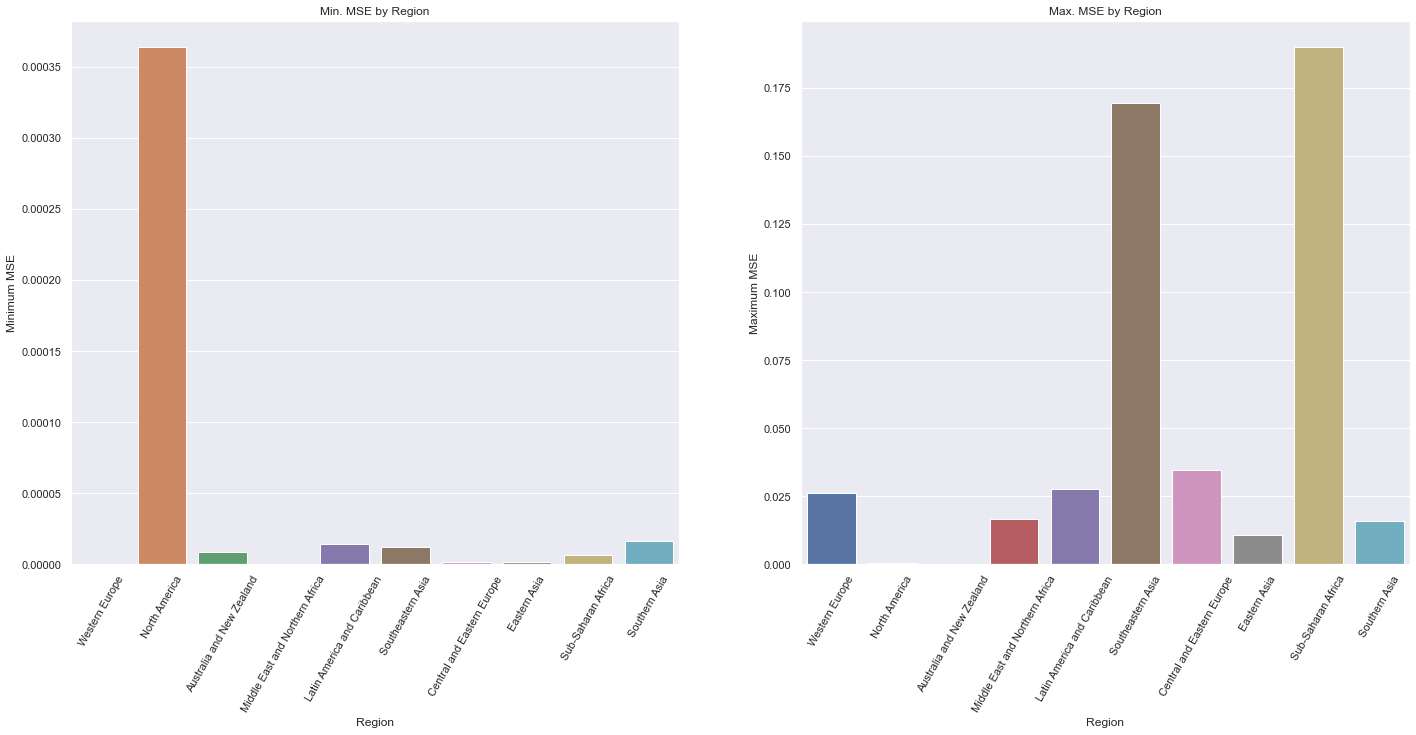

In [63]:
# Plotting bargraphs of both max. and min. MSEs for visualisation
f, axes = plt.subplots(1, 2, figsize=(24, 10))
sb.barplot(data = rnn_model, x = 'Region', y = 'Minimum MSE', ax = axes[0])
plt.xticks(rotation = 50)
axes[0].set_title('Min. MSE by Region')     # Set title of subplot
axes[0].tick_params('x', labelrotation = 60)   # Set x-axis labels to be diagonal
sb.barplot(data = rnn_model, x = 'Region', y = 'Maximum MSE')
axes[1].set_title('Max. MSE by Region')
axes[1].tick_params('x', labelrotation = 60)

## Insights:
<ul>
    <li> Overall very low MSE across all the regions, with Sub-Saharan Africa having the highest Max. MSE (this value varies everytime the computation is done), which is much better than the multi-variate linear regression model
    <li> Hence, it can be said that it can predict future happiness scores with a fairly high accuracy
    <li> However, happiness scores can vary due to other variables than the ones given in the dataset, and recent events such as the COVID 19 pandemic and the Russia-Ukraine War would likely affect it drastically (at least for most regions)
    <li> Predictions may not be all that accurate if such events did take place, which is not accounted for in the dataset
</ul>

## Improvements:
<ul>
    <li> Larger dataset of more years would likely make the model better - this is quite a significant setback as there are only 5 years worth of data (2015 - 2019) availble in the World Happiness Index dataset
    <li> Usage of other time series forecasting algorithms or other RNN models could yield better results
</ul>